<a href="https://colab.research.google.com/github/Ahmed-Haitham/Ahmed-Haitham/blob/main/Exploring_Credit_Card_Usage_Patterns_and_Customer_Behaviors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**💳💰 Exploring Credit Card Usage Patterns and Customer Behaviors:** An Analysis using Clustering and Dimensionality Reduction Techniques
**By: Ahmed Haitham Abdelmaksoud**

Data Science and Business Analytics Master's Student

Faculty of Economic Sciences

University of Warsaw

<img src = "https://www.hdatasystems.com/assets/case-study/credit-card-behavior-analysis/credi-card-an.png" width = "600px" height = "400px">

##**Project Description**:

The project aims to explore credit card usage patterns and customer behaviors by analyzing a credit card dataset. The insights generated from the analysis will help in understanding the spending habits and frequency of customers, their payment behaviors and the distribution of various transactions made using the credit card.

The analysis involves applying various clustering algorithms, including Kmeans, DBSCAN, and Hierarchical, to segment the customers based on their credit card usage patterns. The results of the clustering algorithms are then visualized using t-SNE to gain a better understanding of the customer segments.

Furthermore, the project also applies two dimensionality reduction techniques, PCA and KPCA, to the data to simplify the complexity and retain the important features. The same clustering algorithms are then applied after the dimensionality reduction to see the impact of the reduction on the clustering results.

The quality of the clustering results is evaluated using three quality measures - Silhouette Score, Davies Bouldin Score, and Calinski Harabasz Score. The results of this analysis will help in gaining a deeper understanding of the credit card usage patterns and customer behaviors and aid in identifying key customer segments for targeted marketing and customer retention strategies.

## **About The Dataset**

- <b>CUSTID :</b> Identification of Credit Card holder (Categorical)
- <b>BALANCE :</b> Balance amount left in their account to make purchases
- <b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- <b>PURCHASES : </b> Amount of purchases made from account
- <b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go
- <b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment
- <b>CASHADVANCE :</b> Cash in advance given by the user
- <b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 not frequently purchased)
- <b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- <b>PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- <b>CASHADVANCEFREQUENCY : </b> How frequently the cash in advance being paid
- <b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"
- <b>PURCHASESTRX :</b> Numbe of purchase transactions made
- <b>CREDITLIMIT :</b> Limit of Credit Card for user
- <b>PAYMENTS :</b> Amount of Payment done by user
- <b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user
- <b>PRCFULLPAYMENT :</b> Percent of full payment paid by user
- <b>TENURE :</b> Tenure of credit card service for user

##**Importing necessary tools:**

In [ ]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

## **Data Cleaning and Preprocessing**
In this section, we will:

* Import the data and check the data types.
* Drop the "CUST_ID" column as it won't be used since we focus on numeric columns for this project.
* Convert the remaining columns to floats.
* Copy this version of the data (using the copy method) to a variable to preserve it.

**Uploading credit card data**

In [ ]:
from google.colab import files
data_to_load = files.upload()

import io
data = pd.read_csv(io.BytesIO(data_to_load['Credit Card.csv']))

Saving Credit Card.csv to Credit Card.csv


In [ ]:
data.head().T

0            1            2  \
CUST_ID                               C10001       C10002       C10003   
BALANCE                            40.900749  3202.467416  2495.148862   
BALANCE_FREQUENCY                   0.818182     0.909091          1.0   
PURCHASES                               95.4          0.0       773.17   
ONEOFF_PURCHASES                         0.0          0.0       773.17   
INSTALLMENTS_PURCHASES                  95.4          0.0          0.0   
CASH_ADVANCE                             0.0  6442.945483          0.0   
PURCHASES_FREQUENCY                 0.166667          0.0          1.0   
ONEOFF_PURCHASES_FREQUENCY               0.0          0.0          1.0   
PURCHASES_INSTALLMENTS_FREQUENCY    0.083333          0.0          0.0   
CASH_ADVANCE_FREQUENCY                   0.0         0.25          0.0   
CASH_ADVANCE_TRX                           0            4            0   
PURCHASES_TRX                              2            0           12   
CREDIT_LIMIT                          1000.0       7000.0       7500.0   
PAYMENTS                          201.802084  4103.032597   622.066742   
MINIMUM_PAYMENTS                  139.509787  1072.340217   627.284787   
PRC_FULL_PAYMENT                         0.0     0.222222          0.0   
TENURE                                    12           12           12   

                                            3           4  
CUST_ID                                C10004      C10005  
BALANCE                           1666.670542  817.714335  
BALANCE_FREQUENCY                    0.636364         1.0  
PURCHASES                              1499.0        16.0  
ONEOFF_PURCHASES                       1499.0        16.0  
INSTALLMENTS_PURCHASES                    0.0         0.0  
CASH_ADVANCE                       205.788017         0.0  
PURCHASES_FREQUENCY                  0.083333    0.083333  
ONEOFF_PURCHASES_FREQUENCY           0.083333    0.083333  
PURCHASES_INSTALLMENTS_FREQUENCY          0.0         0.0  
CASH_ADVANCE_FREQUENCY               0.083333         0.0  
CASH_ADVANCE_TRX                            1           0  
PURCHASES_TRX                               1           1  
CREDIT_LIMIT                           7500.0      1200.0  
PAYMENTS                                  0.0  678.334763  
MINIMUM_PAYMENTS                          NaN  244.791237  
PRC_FULL_PAYMENT                          0.0         0.0  
TENURE                                     12          12

In [ ]:
data.shape

(8950, 18)

**Checking Data Types**

In [ ]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

📌 **From data we found:**
* 1 'object' column to be removed. 
* 3 'int64' columns to be converted to 'float64'.



In [ ]:
# Removing "CUST_ID" column
data.drop(labels='CUST_ID', axis=1, inplace=True)

# Converting "int64" coumns to "float64"
int_col = list(data.columns[data.dtypes == "int64"])

for col in int_col:
  data[col] = data[col].astype(float)

data.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
dtype: object

**Checking Duplicates & Null Values**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

📌 **From above:**
* We have no duplicates.
* We have 314 null values, will be imputed with the "median" value.

In [ ]:
# Imputing null values with "median" value
from sklearn.impute import SimpleImputer
col_names = list(data.columns)
data = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(data), columns=col_names)

# Double checking again for null values
data.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

**Preserve the original data.**

In [ ]:
data_orig = data.copy()

## **Exploratory Data Analysis**

We need to ensure the data is scaled and (relatively) normally distributed.

* Examine the correlation and skew.
* Check for outliers, handle them if exist.
* Perform any transformations and scale data.
* View the pairwise correlation plots of the new data.

**Descriptive Statistics of Data**

In [ ]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.282473  3638.646702  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   844.906767  2332.792322   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.857654   312.343947   788.713501   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

**Examining the Correlation Between Categories**

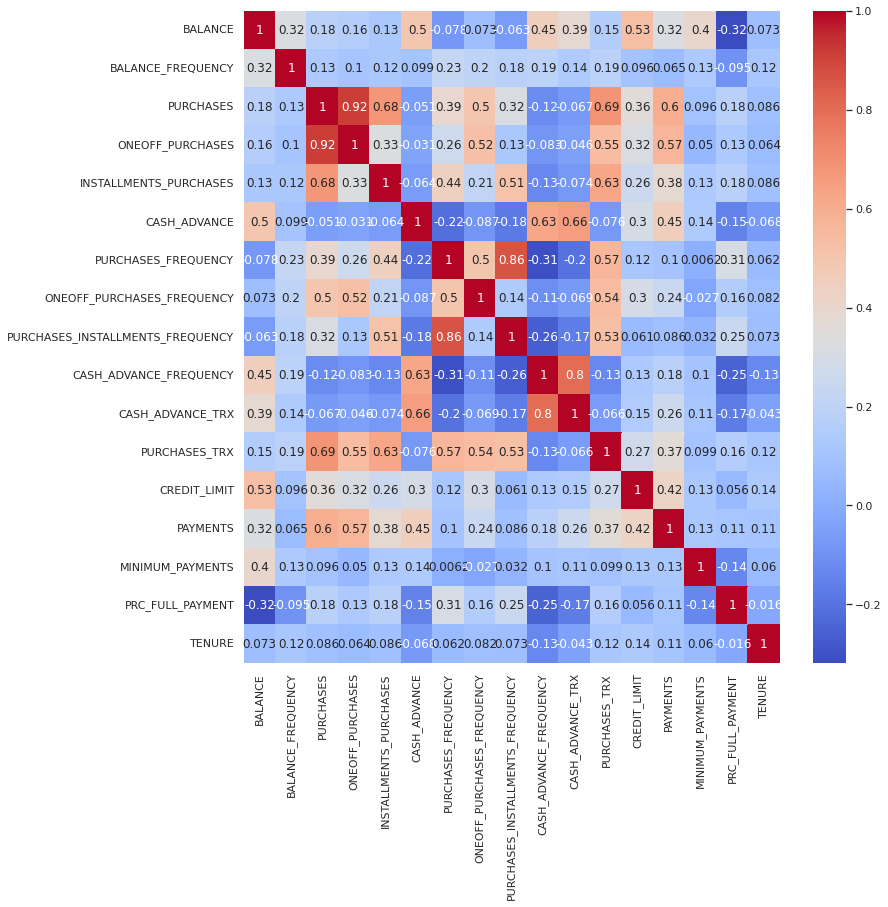

In [ ]:
corr_mat = data.corr()
sns.set(font_scale=1)
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', 
            xticklabels=corr_mat.columns,
            yticklabels=corr_mat.columns)

In [ ]:
# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           0.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           0.000000   0.133674   
PURCHASES                         0.181261           0.133674   0.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531296           0.095931   0.356977   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.397920           0.131181   0.095789   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          0.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                0.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319735                0.256515   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.050256                0.134019   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          0.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             0.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303997             0.119833   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.140747             0.006154   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        


**The two categories with their respective most strongly correlated variable.**

In [ ]:
corr_mat.abs().idxmax().sort_values()

BALANCE_FREQUENCY                                            BALANCE
MINIMUM_PAYMENTS                                             BALANCE
CREDIT_LIMIT                                                 BALANCE
PRC_FULL_PAYMENT                                             BALANCE
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
CASH_ADVANCE                                        CASH_ADVANCE_TRX
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
BALANCE                                                 CREDIT_LIMIT
TENURE                                                  CREDIT_LIMIT
PURCHASES                                           ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES                                     PURCHASES
PURCHASES_TRX                                              PURCHASES
ONEOFF_PURCHASES                                           PURCHASES
PAYMENTS                                                   PURCHASES
PURCHASES_INSTALLMENTS_FREQUENCY  

**Viewing correlated variables which are above than 0.50:**

In [ ]:
corr_mat.abs().idxmax().sort_values()[corr_mat.abs().max()>0.5]

CREDIT_LIMIT                                                 BALANCE
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
CASH_ADVANCE                                        CASH_ADVANCE_TRX
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
BALANCE                                                 CREDIT_LIMIT
PURCHASES                                           ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES                                     PURCHASES
PURCHASES_TRX                                              PURCHASES
ONEOFF_PURCHASES                                           PURCHASES
PAYMENTS                                                   PURCHASES
PURCHASES_INSTALLMENTS_FREQUENCY                 PURCHASES_FREQUENCY
PURCHASES_FREQUENCY                 PURCHASES_INSTALLMENTS_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY                             PURCHASES_TRX
dtype: object

📌 **From the correlation matrix analysis:**
* We will remove columns "INSTALLMENTS_PURCHASES", "PURCHASES_TRX", "ONEOFF_PURCHASES", "PAYMENTS"; as they have a high correlation with "PURCHASES".
* We will remove columns "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE" ; as they have a high correlation with "CASH_ADVANCE_TRX".
* We will remove column "PURCHASES_INSTALLMENTS_FREQUENCY"; as they have a high correlation with "PURCHASES_FREQUENCY".
* We will remove column "CREDIT_LIMIT"; as they have a high correlation with "BALANCE".

In [ ]:
variables_to_remove = ["INSTALLMENTS_PURCHASES", "PURCHASES_TRX", "ONEOFF_PURCHASES", "PAYMENTS", "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE", "PURCHASES_INSTALLMENTS_FREQUENCY", "CREDIT_LIMIT"] 

for v in variables_to_remove:
  data.drop(v, axis=1, inplace=True)

data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
0    40.900749           0.818182      95.40             0.166667   
1  3202.467416           0.909091       0.00             0.000000   
2  2495.148862           1.000000     773.17             1.000000   
3  1666.670542           0.636364    1499.00             0.083333   
4   817.714335           1.000000      16.00             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  MINIMUM_PAYMENTS  \
0                    0.000000               0.0        139.509787   
1                    0.000000               4.0       1072.340217   
2                    1.000000               0.0        627.284787   
3                    0.083333               1.0        312.343947   
4                    0.083333               0.0        244.791237   

   PRC_FULL_PAYMENT  TENURE  
0          0.000000    12.0  
1          0.222222    12.0  
2          0.000000    12.0  
3          0.000000    12.0  
4          0.000000    12.0

In [ ]:
data.shape

(8950, 9)

**📌 We reduced the dataset, so 9 columns can explain the 18 columns of the original dataset**

**Examining the skewness of data. Looks like most of data need transformation.**

In [ ]:
skewed_columns = data.skew().sort_values(ascending=False)

# Select columns that need log transformation
skewed_columns = skewed_columns.loc[skewed_columns > 0.75]

skewed_columns

MINIMUM_PAYMENTS              13.852446
PURCHASES                      8.144269
CASH_ADVANCE_TRX               5.721298
BALANCE                        2.393386
PRC_FULL_PAYMENT               1.942820
ONEOFF_PURCHASES_FREQUENCY     1.535613
dtype: float64

**Checking for Outliers**

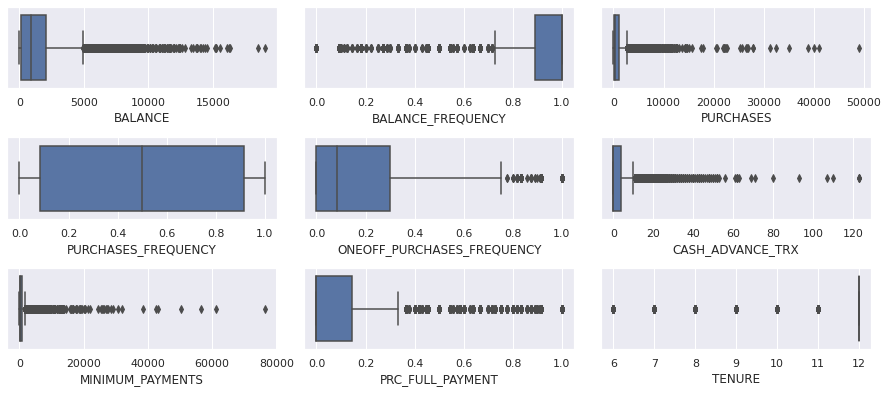

In [ ]:
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.2, bottom=0.2, right=1, top=1, wspace=0.1, hspace=0.6)

for i, col in enumerate(data.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(data[col])

📌 **We have a high skewness and a lot of outliers, let's handel them by using log transformations**.



In [ ]:
data_log = data.copy()
# The log transformations
for col in data_log.columns:
    data_log[col] = np.log1p(data_log[col])

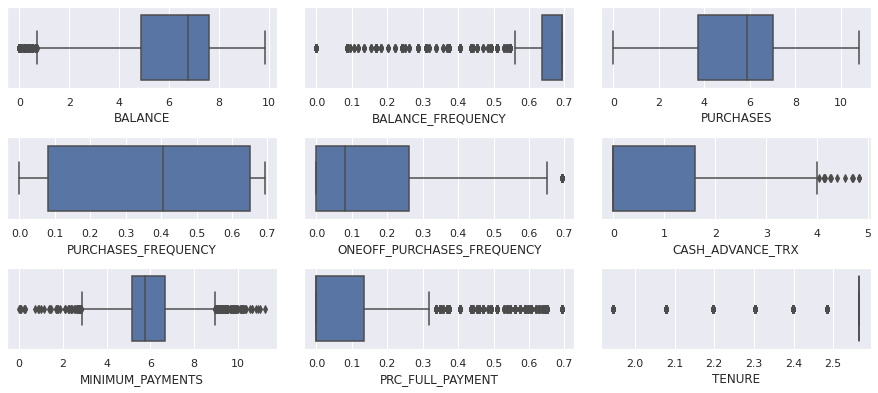

In [ ]:
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.2, bottom=0.2, right=1, top=1, wspace=0.1, hspace=0.6)

for i, col in enumerate(data_log.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(data_log[col])

In [ ]:
data_log.describe().T

count      mean       std       min       25%  \
BALANCE                     8950.0  6.161637  2.013303  0.000000  4.861995   
BALANCE_FREQUENCY           8950.0  0.619940  0.148590  0.000000  0.635989   
PURCHASES                   8950.0  4.899647  2.916872  0.000000  3.704627   
PURCHASES_FREQUENCY         8950.0  0.361268  0.277317  0.000000  0.080042   
ONEOFF_PURCHASES_FREQUENCY  8950.0  0.158699  0.216672  0.000000  0.000000   
CASH_ADVANCE_TRX            8950.0  0.817570  1.009316  0.000000  0.000000   
MINIMUM_PAYMENTS            8950.0  5.916079  1.169929  0.018982  5.146667   
PRC_FULL_PAYMENT            8950.0  0.117730  0.211617  0.000000  0.000000   
TENURE                      8950.0  2.519680  0.130367  1.945910  2.564949   

                                 50%       75%        max  
BALANCE                     6.773521  7.628099   9.854515  
BALANCE_FREQUENCY           0.693147  0.693147   0.693147  
PURCHASES                   5.892417  7.013133  10.800403  
PURCHASES_FREQUENCY         0.405465  0.650588   0.693147  
ONEOFF_PURCHASES_FREQUENCY  0.080042  0.262364   0.693147  
CASH_ADVANCE_TRX            0.000000  1.609438   4.820282  
MINIMUM_PAYMENTS            5.747301  6.671670  11.243832  
PRC_FULL_PAYMENT            0.000000  0.133531   0.693147  
TENURE                      2.564949  2.564949   2.564949

**Scaling the data by using ```MinMaxScaler``` function**



In [ ]:
data_log_scaled = data_log.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in data_log_scaled.columns:
    data_log_scaled[col] = scaler.fit_transform(data_log_scaled[[col]])

In [ ]:
data_log_scaled.describe().T

count      mean       std  min       25%  \
BALANCE                     8950.0  0.625260  0.204303  0.0  0.493377   
BALANCE_FREQUENCY           8950.0  0.894384  0.214369  0.0  0.917538   
PURCHASES                   8950.0  0.453654  0.270071  0.0  0.343008   
PURCHASES_FREQUENCY         8950.0  0.521199  0.400083  0.0  0.115477   
ONEOFF_PURCHASES_FREQUENCY  8950.0  0.228954  0.312592  0.0  0.000000   
CASH_ADVANCE_TRX            8950.0  0.169610  0.209390  0.0  0.000000   
MINIMUM_PAYMENTS            8950.0  0.525361  0.104227  0.0  0.456815   
PRC_FULL_PAYMENT            8950.0  0.169849  0.305299  0.0  0.000000   
TENURE                      8950.0  0.926872  0.210596  0.0  1.000000   

                                 50%       75%  max  
BALANCE                     0.687352  0.774072  1.0  
BALANCE_FREQUENCY           1.000000  1.000000  1.0  
PURCHASES                   0.545574  0.649340  1.0  
PURCHASES_FREQUENCY         0.584963  0.938600  1.0  
ONEOFF_PURCHASES_FREQUENCY  0.115477  0.378512  1.0  
CASH_ADVANCE_TRX            0.000000  0.333889  1.0  
MINIMUM_PAYMENTS            0.510325  0.592675  1.0  
PRC_FULL_PAYMENT            0.000000  0.192645  1.0  
TENURE                      1.000000  1.000000  1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb8c556d0>,
      dtype=object)

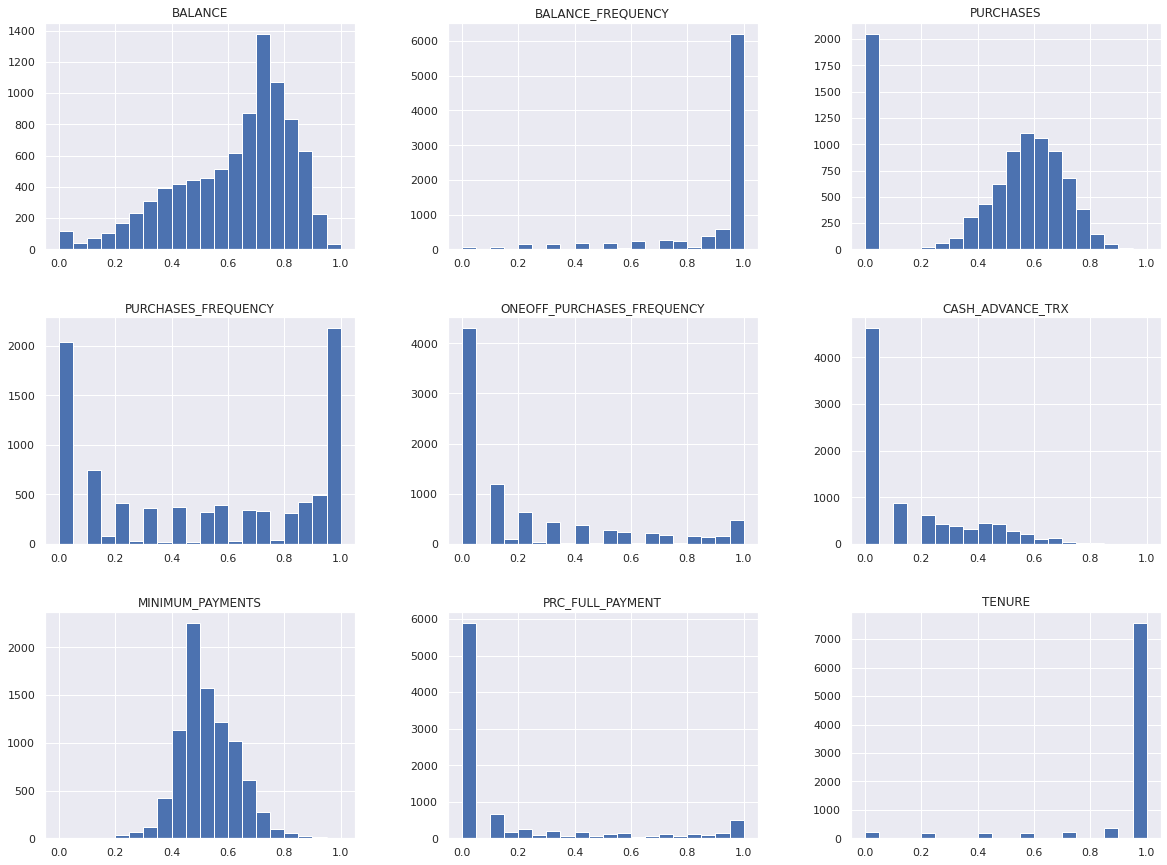

In [ ]:
data_log_scaled.hist(bins=20, figsize=(20,15))

In [ ]:
data_log_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
0  0.379045           0.862497   0.422994             0.222393   
1  0.819116           0.932886   0.000000             0.000000   
2  0.793799           1.000000   0.615884             1.000000   
3  0.752871           0.710494   0.677125             0.115477   
4  0.680676           1.000000   0.262325             0.115477   

   ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  MINIMUM_PAYMENTS  \
0                    0.000000          0.000000          0.438874   
1                    0.000000          0.333889          0.620013   
2                    1.000000          0.000000          0.572303   
3                    0.115477          0.143798          0.510325   
4                    0.115477          0.000000          0.488693   

   PRC_FULL_PAYMENT  TENURE  
0          0.000000     1.0  
1          0.289506     1.0  
2          0.000000     1.0  
3          0.000000     1.0  
4          0.000000     1.0

## **T-Distributed Stochastic Neighbor Embedding (TSNE)**
Visualizing data with T-Distributed Stochastic Neighbor Embedding (TSNE), which is a method for visualizing high-dimensional data. 
* Setup the algorithm of t-SNE.
* Apply the algorithm to the data, and reduce the dimensions from 9 to 2. 




In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, n_iter = 300, random_state=42, perplexity=50.0)
tsne = tsne.fit_transform(data_log_scaled)

In [ ]:
data_tsne = pd.DataFrame(tsne, columns = ["Feature 1", "Feature 2"])
data_tsne.head()

Feature 1  Feature 2
0  -2.177018  -0.936011
1  -6.767416  -3.585382
2  10.861821  -3.738966
3  -2.325291  -1.241126
4  -1.916582  -4.543330

[Text(0.5, 1.0, 't-SNE Visulization')]

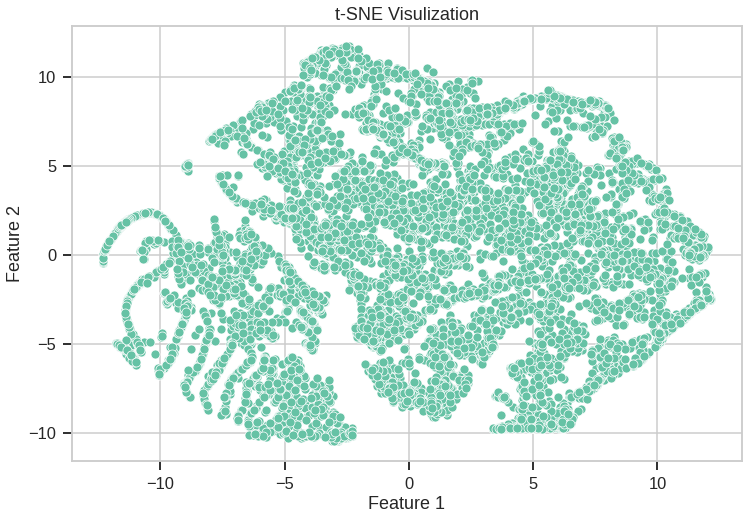

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne.columns[0], y=data_tsne.columns[1], data=data_tsne, 
                palette=sns.color_palette("hls", 2)).set(title='t-SNE Visulization')

## **Clustering**
* Applying KMeans clustering.
* Applying DBSCAN clustering.
* Applying Heirarchical clustering.

####**KMeans Clustering**
In this section we will:
* Run a K-means algorithm.
* Use the inertia curve "The Elbow Method" to determine the optimal number of clusters.
* Calculate "Silhouette Score", "Calinski Harabasz Score" and "Davies Bouldin Score".


In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


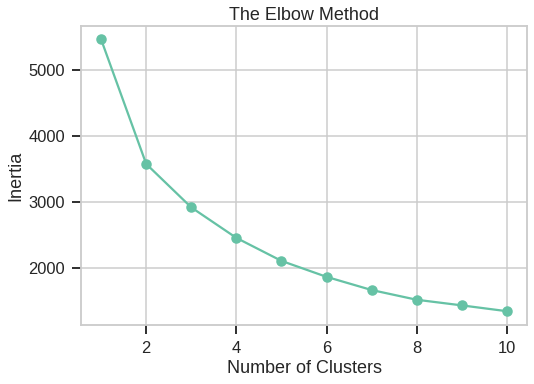

In [ ]:
inertia = []
num_clusters = range(1,11)
for num in num_clusters:
    km = KMeans(n_clusters=num, init='k-means++')
    km.fit(data_log_scaled)
    inertia.append(km.inertia_)
    
plt.plot(num_clusters, inertia)
plt.scatter(num_clusters, inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [ ]:
drop_variation = []
drop_variation.append(0) #add 0 in the first element 

for i in range(len(inertia) - 1):
    dropValue = inertia[i] - inertia[i+1]
    drop_variation.append(dropValue) 

# select suitable k that have large drop in the variation
n = np.argmax(drop_variation)+1
print("By using the Elbow Method, suitable number of clusters = ",n)

By using the Elbow Method, suitable number of clusters =  2


**Using "Silhouette Score" with different cluster number and select the optimum k**



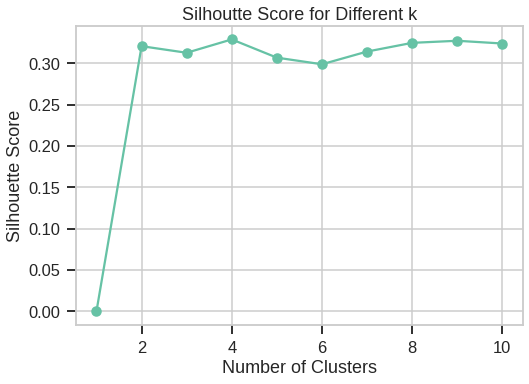

In [ ]:
# Calculate silhoutte score for different k

from sklearn.metrics import silhouette_score

s_scores = []
s_scores.append(0)
for num in [*range(2,11)]:
  km = KMeans(n_clusters = num, init='k-means++')
  km.fit(data_log_scaled)
  km_labels = km.labels_

  s_scores.append(silhouette_score(data_log_scaled, km_labels, metric = "euclidean"))

plt.plot(num_clusters, s_scores)
plt.scatter(num_clusters, s_scores)
plt.title('Silhoutte Score for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score'); 

•For n_clusters = 2 The average silhouette_score is : 0.3208255248471594


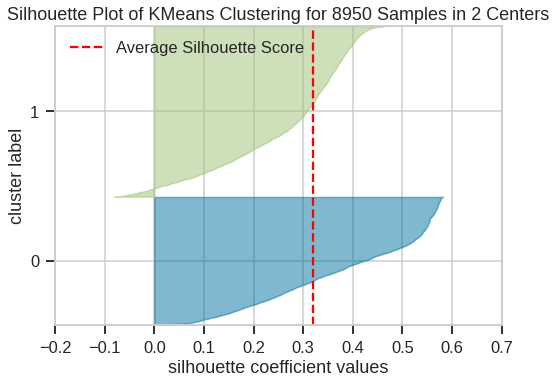

--------------------------------------------------------------------------------
•For n_clusters = 3 The average silhouette_score is : 0.3128418277528761


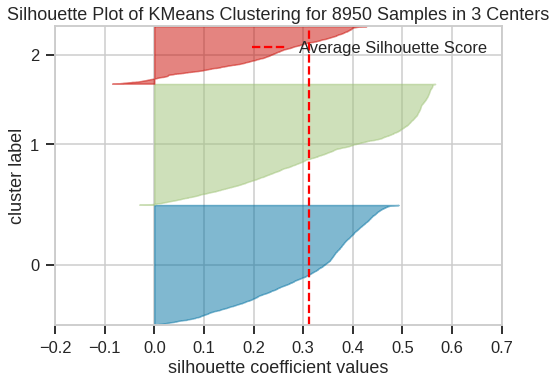

--------------------------------------------------------------------------------
•For n_clusters = 4 The average silhouette_score is : 0.32902734499225617


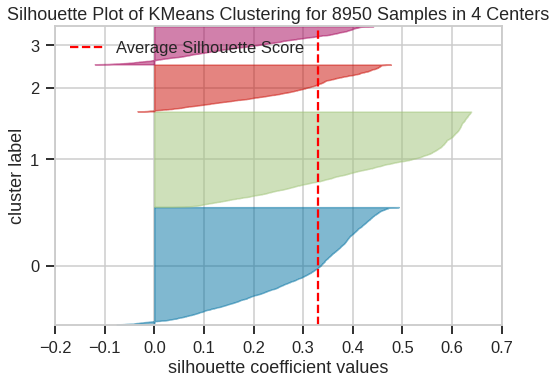

--------------------------------------------------------------------------------
•For n_clusters = 5 The average silhouette_score is : 0.3069664137711808


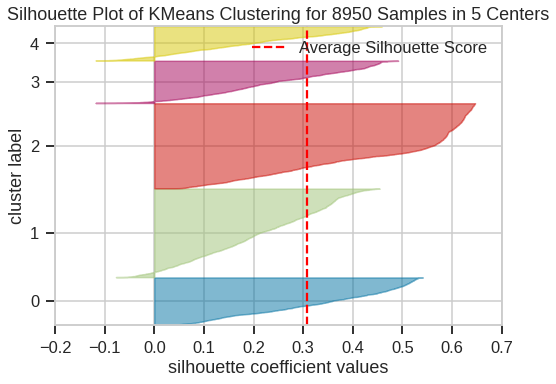

--------------------------------------------------------------------------------
•For n_clusters = 6 The average silhouette_score is : 0.29892980187831164


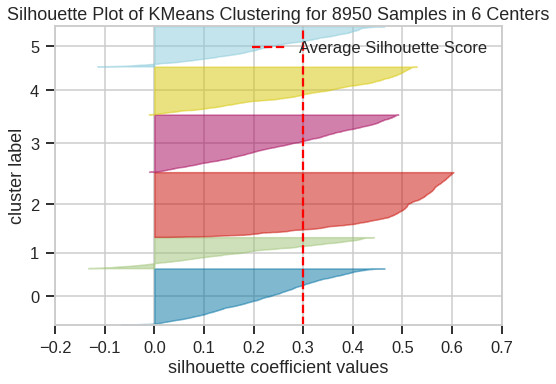

--------------------------------------------------------------------------------
•For n_clusters = 7 The average silhouette_score is : 0.31458414026977977


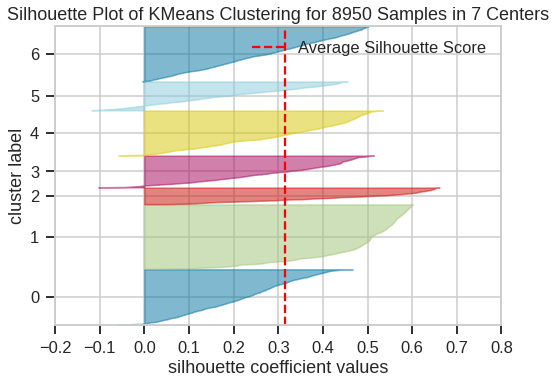

--------------------------------------------------------------------------------
•For n_clusters = 8 The average silhouette_score is : 0.3248447810441366


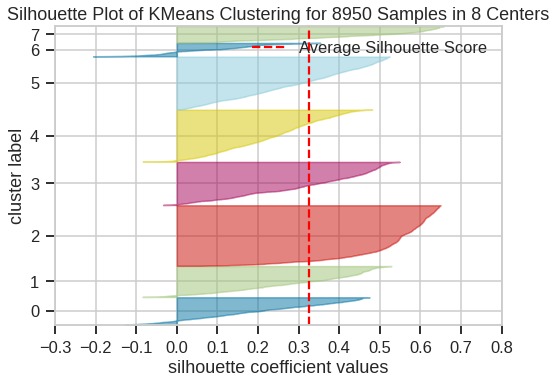

--------------------------------------------------------------------------------
•For n_clusters = 9 The average silhouette_score is : 0.33206111007665495


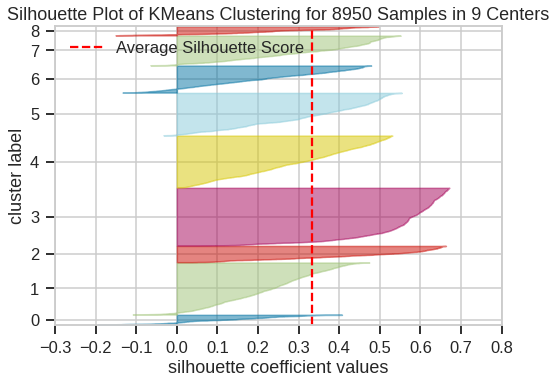

--------------------------------------------------------------------------------
•For n_clusters = 10 The average silhouette_score is : 0.32423770658510875


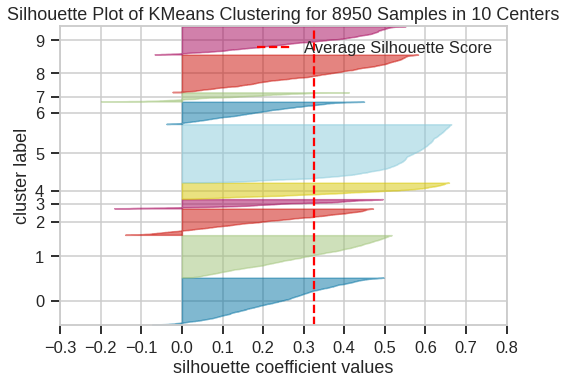

--------------------------------------------------------------------------------


In [ ]:
# Visualize silhoutte score for different k
from yellowbrick.cluster import SilhouetteVisualizer
for i in [*range(2,11)]:
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(data_log_scaled)
    km_label = kmeans.labels_
    print("•For n_clusters =",i,"The average silhouette_score is :",silhouette_score(data_log_scaled, km_label, metric='euclidean'))
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(data_log_scaled)
    visualizer.show()  
    print('----'*20)

📌 By using "Silhouette Score", suitable number of clusters =  4

**Using "Davies Bouldin Score" with different cluster number and select the optimum k**

The optimum k when DB score is the lowest.



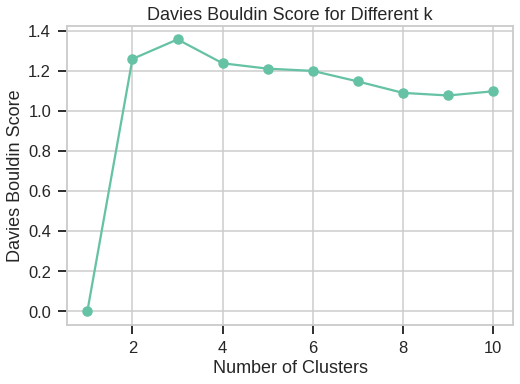

In [ ]:
# Calculate Davies Bouldin score for different k

from sklearn.metrics import davies_bouldin_score

db_scores = []
db_scores.append(0)
for num in [*range(2,11)]:
  km = KMeans(n_clusters = num, init='k-means++')
  km.fit(data_log_scaled)
  labels = km.labels_

  db_scores.append(davies_bouldin_score(data_log_scaled, labels))

plt.plot(num_clusters, db_scores)
plt.scatter(num_clusters, db_scores)
plt.title('Davies Bouldin Score for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score'); 

📌 By using "Davies Bouldin Score", suitable number of clusters =  8

**Using "Calinski Harabasz Score" with different cluster number and select the optimum k**

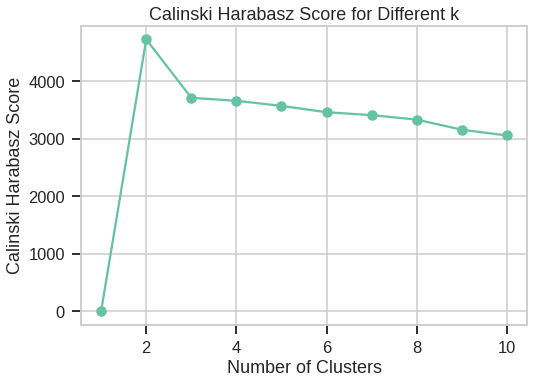

In [ ]:
# Calculate Calinski Harabasz score for different k

from sklearn.metrics import calinski_harabasz_score

ch_scores = []
ch_scores.append(0)
for num in [*range(2,11)]:
  km = KMeans(n_clusters = num, init='k-means++')
  km.fit(data_log_scaled)
  labels = km.labels_

  ch_scores.append(calinski_harabasz_score(data_log_scaled, labels))

plt.plot(num_clusters, ch_scores)
plt.scatter(num_clusters, ch_scores)
plt.title('Calinski Harabasz Score for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score'); 

📌 By using "Calinski Harabasz Score", suitable number of clusters = 4

**Visualizing Kmeans Clustering Results with t-SNE**

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++').fit(data_log_scaled)
km_labels = kmeans.labels_

In [ ]:
data_tsne_kmeans = data_tsne.copy()
data_tsne_kmeans['Cluster'] = km_labels
data_tsne_kmeans.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        2
1  -6.767416  -3.585382        3
2  10.861821  -3.738966        1
3  -2.325291  -1.241126        3
4  -1.916582  -4.543330        3

[Text(0.5, 1.0, 't-SNE Visulization with KMeans')]

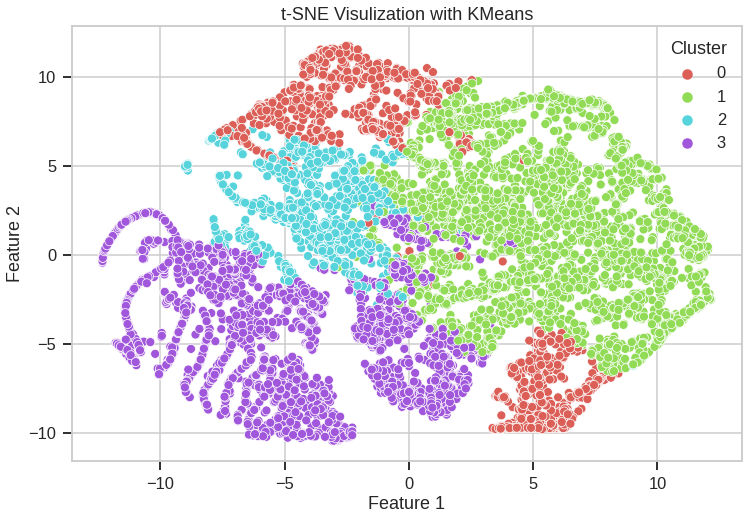

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_kmeans.columns[0], y=data_tsne_kmeans.columns[1], 
                data=data_tsne_kmeans, palette=sns.color_palette("hls", k),
                hue = data_tsne_kmeans['Cluster']).set(title='t-SNE Visulization with KMeans')

📌 **So far, we have a high average inertia, low silhouette scores, and very wide fluctuations in the size of the silhouette and Davies Bouldin plots. This is not good. Let's try DBSCAN clustering.**

####**DBSCAN Clustering**
In this section we will:
* Calculate the optimum "eps" by using K-Nearest Neighbors (KNN).
* Run a DBSCAN algorithm.
* Calculate "Silhouette Score", "Calinski Harabasz Score" and "Davies Bouldin Score".


**Calculate the optimum "eps" by using K-Nearest Neighbors (KNN).**

In [ ]:
from sklearn.neighbors import NearestNeighbors
# By requesting "min_samples + 1 nearest", we are asking for the nearest 1 data point in addition to the minimum data point, as the data point itself (with a distance of 0) is included in the calculation.
min_samples = 15
knn = NearestNeighbors(n_neighbors=min_samples+1)
knn.fit(data_log_scaled)
distances, neighbors = knn.kneighbors(data_log_scaled)

# The "distances" refers to the distance of each data point to its k nearest neighbors.
# The "neighbors" refers to the indices of the k nearest neighbors for each data point.

In [ ]:
distances = np.sort(distances[:,-1], axis = 0)

**Elbow Method to choose the suitable epsilon**

Text(0.5, 1.0, 'Elbow Method for Choosing eps')

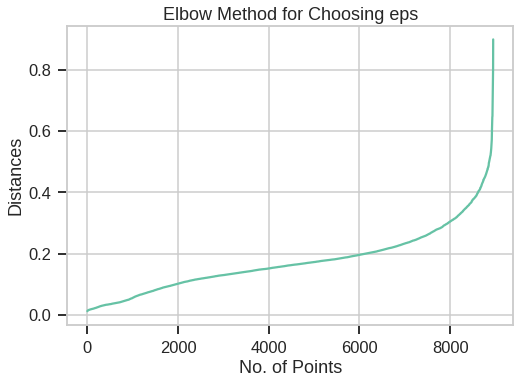

In [ ]:
plt.plot(distances)
plt.xlabel("No. of Points")
plt.ylabel("Distances")
plt.title("Elbow Method for Choosing eps")

📌 From elbow method, the optimum eps = *0.3*




In [ ]:
db = DBSCAN(eps=0.3, min_samples=15).fit(data_log_scaled)
db_labels =db.labels_
pd.DataFrame(db_labels).value_counts()

 0    8502
-1     434
 1      14
dtype: int64

📌 There is 434 Noise Points

**Evaluating the Silhouette Score with DBSCAN**




Remove Noise Points before evaluating the Silhouette Score 

In [ ]:
db_labels_df = pd.DataFrame(db_labels, columns = ["db_labels"])[db_labels>-1]
data_log_scaled_labeled = data_log_scaled.copy()
data_log_scaled_labeled['db_labels'] = db_labels_df
data_log_scaled_labeled.dropna(inplace=True)


In [ ]:
s_score = silhouette_score(data_log_scaled_labeled, db_labels_df, metric = "euclidean")
print('Silhouett Score: %.3f' % s_score)

Silhouett Score: 0.347


**Evaluating the Davies Bouldin with DBSCAN**

In [ ]:
db_score = davies_bouldin_score(data_log_scaled_labeled, db_labels_df)
print('Davies Bouldin Score: %.3f' % db_score)

Davies Bouldin Score: 0.719


**Evaluating the Calinski Harabasz with DBSCAN**

In [ ]:
ch_score = calinski_harabasz_score(data_log_scaled_labeled, db_labels_df)
print('Calinski Harabasz Score: %.3f' % ch_score)

Calinski Harabasz Score: 42.433


**Visualizing DBSCAN Clustering Results with t-SNE**

In [ ]:
data_tsne_dbscan = data_tsne.copy()
data_tsne_dbscan['Cluster'] = db_labels
data_tsne_dbscan.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        0
1  -6.767416  -3.585382        0
2  10.861821  -3.738966        0
3  -2.325291  -1.241126        0
4  -1.916582  -4.543330        0

[Text(0.5, 1.0, 't-SNE Visulization with DBSCAN')]

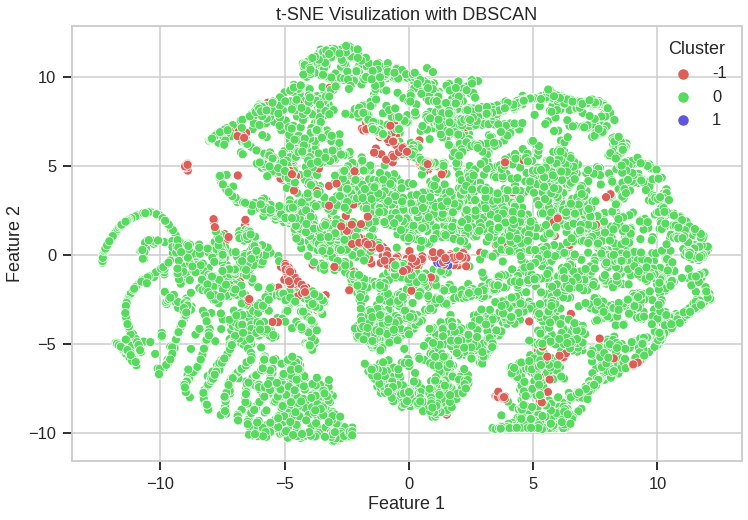

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_dbscan.columns[0], y=data_tsne_dbscan.columns[1], 
                data=data_tsne_dbscan, palette=sns.color_palette("hls", 3),
                hue = data_tsne_dbscan['Cluster']).set(title='t-SNE Visulization with DBSCAN')

####**Hierarchical Clustering**
In this section we will:
* Create a Dendogram, and select optimum number of clusters.
* Run an Agglomerative Clustering.
* Calculate "Silhouette Score", "Calinski Harabasz Score" and "Davies Bouldin Score".


**Create a Dendogram, and select optimum number of clusters.**

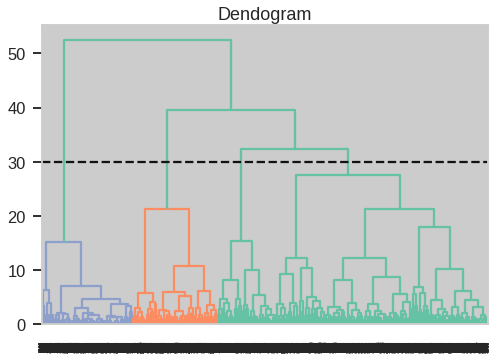

In [ ]:
import scipy.cluster.hierarchy as shc

plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(y=data_log_scaled, method='ward', metric='euclidean'))
# Cut off Dendogram
plt.axhline(y=30, color='k', linestyle='--')

📌 We will go with 4 clusters as a result of the Dendogram.

**Run an Agglomerative Clustering**

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(data_log_scaled)

agg_labels = agg_clustering.labels_
 

**Evaluating the Silhouette Score with Agglomerative Clustering**




In [ ]:
s_score = silhouette_score(data_log_scaled, agg_labels, metric = "euclidean")
print('Silhouett Score: %.3f' % s_score)

Silhouett Score: 0.242


**Evaluating the Davies Bouldin Score with Agglomerative Clustering**




In [ ]:
db_score = davies_bouldin_score(data_log_scaled, agg_labels)
print('Davies Bouldin Score: %.3f' % db_score)

Davies Bouldin Score: 1.344


**Evaluating the Calinski Harabasz Score with Agglomerative Clustering**




In [ ]:
ch_score = calinski_harabasz_score(data_log_scaled, agg_labels)
print('Calinski Harabasz Score: %.3f' % ch_score)

Calinski Harabasz Score: 2892.825


**Visualizing Hiereichal Clustering Results with t-SNE**

In [ ]:
data_tsne_agg = data_tsne.copy()
data_tsne_agg['Cluster'] = agg_labels
data_tsne_agg.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        0
1  -6.767416  -3.585382        3
2  10.861821  -3.738966        2
3  -2.325291  -1.241126        0
4  -1.916582  -4.543330        0

[Text(0.5, 1.0, 't-SNE Visulization with Hiereichal Clustering')]

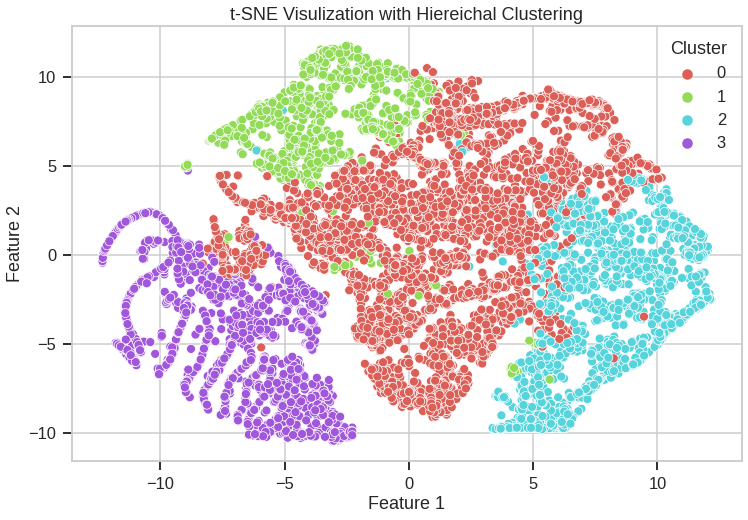

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_agg.columns[0], y=data_tsne_agg.columns[1], 
                data=data_tsne_agg, palette=sns.color_palette("hls", 4),
                hue = data_tsne_agg['Cluster']).set(title='t-SNE Visulization with Hiereichal Clustering')

## **Dimensionality Reduction**
* Principal Component Analysis (PCA)
* Kernel Principal Component Analysis (KPCA)

####**Principal Component Analysis (PCA)**
In this section, we will:

*   Perform PCA with `n_components` ranging from 1 to 8.
*   Store the amount of explained variance for each number of dimensions.
*   Store the feature importance for each number of dimensions.
*   Plot the explained variance and feature importances.


In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 9):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n).fit(data_log_scaled)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,'features': data.columns, 'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

model       var
n                               
1  PCA(n_components=1)  0.453807
2  PCA(n_components=2)  0.647541
3  PCA(n_components=3)  0.746323
4  PCA(n_components=4)  0.835182
5  PCA(n_components=5)  0.908342
6  PCA(n_components=6)  0.950541
7  PCA(n_components=7)  0.978849
8  PCA(n_components=8)  0.995049

**Creating a table of feature importances for each data column.**


In [ ]:
features_df = (pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values'))

features_df

features   BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE_TRX  MINIMUM_PAYMENTS  \
n                                                                           
1         0.025271           0.031984          0.084047          0.011553   
2         0.119052           0.097148          0.097594          0.048135   
3         0.108846           0.104929          0.103503          0.037552   
4         0.104003           0.129451          0.093334          0.039624   
5         0.091592           0.115082          0.099432          0.037496   
6         0.081369           0.135831          0.145200          0.038023   
7         0.091057           0.124225          0.127778          0.044691   
8         0.106367           0.133057          0.127883          0.065040   

features  ONEOFF_PURCHASES_FREQUENCY  PRC_FULL_PAYMENT  PURCHASES  \
n                                                                   
1                           0.183956          0.116473   0.206609   
2                           0.157546          0.180561   0.110122   
3                           0.160840          0.217015   0.099831   
4                           0.196229          0.187482   0.081087   
5                           0.172171          0.165377   0.073142   
6                           0.149531          0.143007   0.068798   
7                           0.139943          0.130141   0.108412   
8                           0.120970          0.118576   0.114075   

features  PURCHASES_FREQUENCY    TENURE  
n                                        
1                    0.323125  0.016982  
2                    0.164323  0.025519  
3                    0.149949  0.017537  
4                    0.151778  0.017011  
5                    0.142801  0.102906  
6                    0.135903  0.102338  
7                    0.140628  0.093126  
8                    0.132616  0.081416

**Creating a plot of explained variances.**

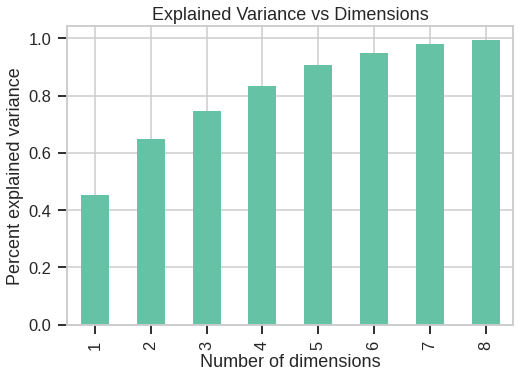

In [ ]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

**Creating a plot of feature importances.**


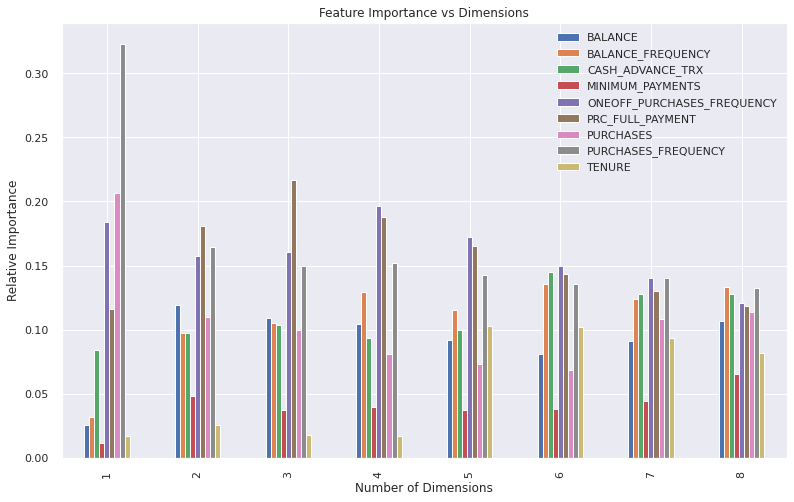

In [ ]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of Dimensions',
       ylabel='Relative Importance',
       title='Feature Importance vs Dimensions');

📌 **From above results we are satisfied with 90% variance with number of dimensions = 5**

**Building our final PCA model**

In [ ]:
PCAmod = PCA(n_components=5).fit_transform(data_log_scaled)
data_pca = pd.DataFrame(PCAmod)
data_pca.shape

(8950, 5)

In [ ]:
data_pca.head()

0         1         2         3         4
0 -0.317075  0.190153  0.231296  0.081305 -0.142632
1 -0.681729  0.023419 -0.338456 -0.118760 -0.099413
2  0.718762 -0.492747 -0.043433  0.351286 -0.026260
3 -0.290525 -0.041801  0.121696  0.183002 -0.122618
4 -0.428537 -0.048146  0.012886  0.060095 -0.148840

####**Kernel Principal Component Analysis (KPCA)**
In this section, we will:

*  Fit a `KernelPCA` model with `kernel='rbf'`.(`rbf` refers to a Radial Basis Function kernel, and the `gamma` parameter governs scaling of this kernel and typically ranges between 0 and 1).
*  Use `GridSearchCV` to tune the parameters of the `KernelPCA` model.

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(data_log_scaled)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=4)

In [ ]:
from sklearn.decomposition import KernelPCA
KPCAmod = KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=4)
data_kpca = pd.DataFrame(KPCAmod.fit_transform(data_log_scaled))
data_kpca.shape

(8950, 4)

In [ ]:
data_kpca.head()

0         1         2         3
0  0.253163  0.049888 -0.343836  0.311849
1  0.628366  0.038118  0.143052 -0.156429
2 -0.473206 -0.211808  0.538043  0.197105
3  0.230809 -0.119973 -0.216055  0.294372
4  0.439519 -0.112241 -0.147068  0.120312

## **Clustering with PCA**
* Applying KMeans clustering + PCA.
* Applying DBSCAN clustering + PCA.
* Applying Heirarchical clustering + PCA.

####**KMeans Clustering + PCA**

In [ ]:
kmeans_pca = KMeans(n_clusters=4, random_state=42).fit(data_pca)

km_pca_labels = kmeans_pca.labels_
km_pca_inertia = kmeans_pca.inertia_
km_pca_centroids = kmeans_pca.cluster_centers_

for i in range(4):
    count = (labels == i).sum()
    print(f"Sum of elements in cluster {i}: {count}")


Sum of elements in cluster 0: 1412
Sum of elements in cluster 1: 1138
Sum of elements in cluster 2: 854
Sum of elements in cluster 3: 487


In [ ]:
s_score = silhouette_score(data_pca, km_pca_labels, metric='euclidean')
print('Silhouett Score: %.3f' % s_score)

Silhouett Score: 0.375


📌 Using PCA made Silhoutte Score of Kmeans increase

**Visualizing Kmeans Clustering + PCA Results with t-SNE**

In [ ]:
data_tsne_km_pca = data_tsne.copy()
data_tsne_km_pca['Cluster'] = km_pca_labels
data_tsne_km_pca.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        3
1  -6.767416  -3.585382        1
2  10.861821  -3.738966        0
3  -2.325291  -1.241126        1
4  -1.916582  -4.543330        1

[Text(0.5, 1.0, 't-SNE Visulization with KMeans Clustering + PCA')]

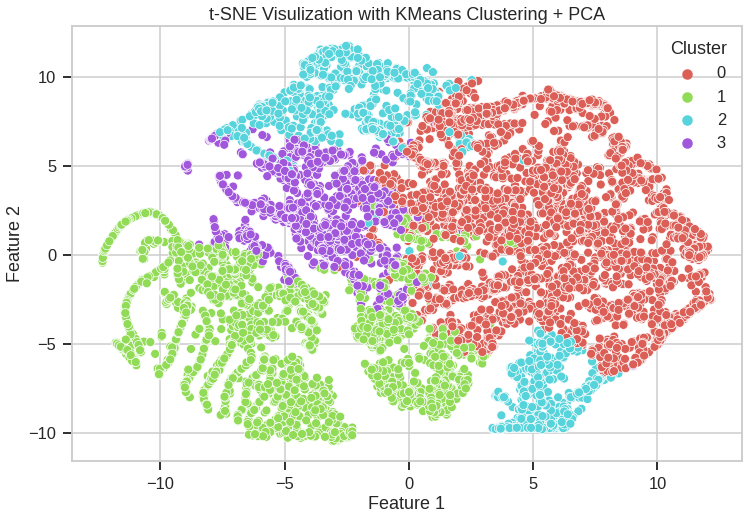

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_km_pca.columns[0], y=data_tsne_km_pca.columns[1], 
                data=data_tsne_km_pca, palette=sns.color_palette("hls", 4),
                hue = data_tsne_km_pca['Cluster']).set(title='t-SNE Visulization with KMeans Clustering + PCA')

####**DBSCAN Clustering + PCA**

In [ ]:
db_pca = DBSCAN(eps=0.3, min_samples=15).fit(data_pca)
db_pca_labels =db_pca.labels_
pd.DataFrame(db_pca_labels).value_counts()

 0    8840
-1      96
 1      14
dtype: int64

📌 With same values eps & min_samples, Noise Points is reduced to 96

**Evaluating the Silhouette Score with DBSCAN**




Remove Noise Points before evaluating the Silhouette Score 

In [ ]:
db_pca_labels_df = pd.DataFrame(db_pca_labels, columns = ["db_pca_labels"])[db_pca_labels>-1]
data_pca_labeled = data_pca.copy()
data_pca_labeled['db_pca_labels'] = db_pca_labels_df
data_pca_labeled.dropna(inplace=True)


In [ ]:
s_score = silhouette_score(data_pca_labeled, db_pca_labels_df, metric = "euclidean")
print('Silhouett Score: %.3f' % s_score)

Silhouett Score: 0.435


📌 Using PCA made Silhoutte Score of DBSCAN increase

**Visualizing DBSCAN Clustering + PCA Results with t-SNE**

In [ ]:
data_tsne_db_pca = data_tsne.copy()
data_tsne_db_pca['Cluster'] = db_pca_labels
data_tsne_db_pca.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        0
1  -6.767416  -3.585382        0
2  10.861821  -3.738966        0
3  -2.325291  -1.241126        0
4  -1.916582  -4.543330        0

[Text(0.5, 1.0, 't-SNE Visulization with DBSCAN Clustering + PCA')]

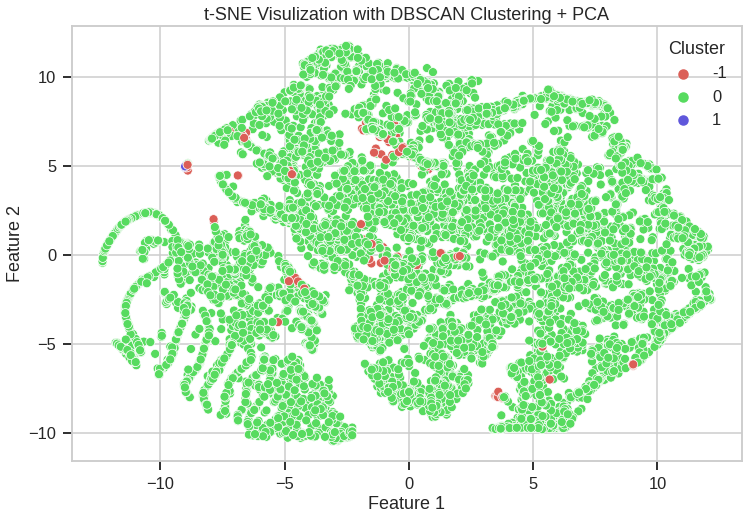

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_db_pca.columns[0], y=data_tsne_db_pca.columns[1], 
                data=data_tsne_db_pca, palette=sns.color_palette("hls", 3),
                hue = data_tsne_db_pca['Cluster']).set(title='t-SNE Visulization with DBSCAN Clustering + PCA')

####**Hiereichal Clustering + PCA**

**Create a Dendogram, and select optimum number of clusters.**

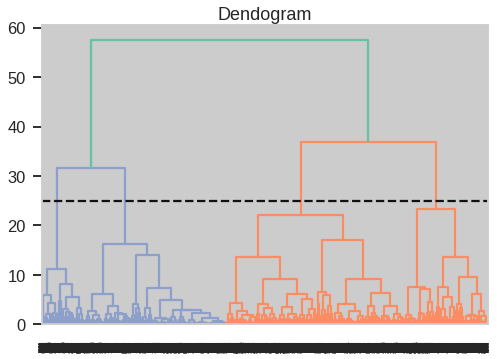

In [ ]:
import scipy.cluster.hierarchy as shc

plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(y=data_pca, method='ward', metric='euclidean'))
# Cut off Dendogram
plt.axhline(y=25, color='k', linestyle='--')

📌 We will go with 4 clusters as a result of the Dendogram.

In [ ]:
agg_pca_clustering = AgglomerativeClustering(n_clusters=4).fit(data_pca)

agg_pca_labels = agg_pca_clustering.labels_
 

**Evaluating the Silhouette Score with Agglomerative Clustering + PCA**




In [ ]:
s_score = silhouette_score(data_pca, agg_pca_labels, metric = "euclidean")
print('Silhouett Score: %.3f' % s_score)

Silhouett Score: 0.350


📌 Using PCA made Silhoutte Score of Hiereichal Clustering increase

**Visualizing Hiereichal Clustering + PCA Results with t-SNE**

In [ ]:
data_tsne_agg_pca = data_tsne.copy()
data_tsne_agg_pca['Cluster'] = agg_pca_labels
data_tsne_agg_pca.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        3
1  -6.767416  -3.585382        1
2  10.861821  -3.738966        2
3  -2.325291  -1.241126        1
4  -1.916582  -4.543330        1

[Text(0.5, 1.0, 't-SNE Visulization with Hiereichal Clustering + PCA')]

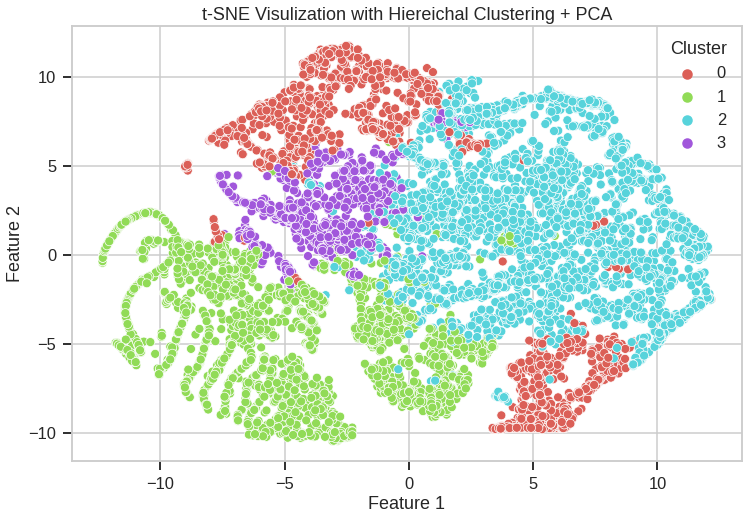

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_agg_pca.columns[0], y=data_tsne_agg_pca.columns[1], 
                data=data_tsne_agg_pca, palette=sns.color_palette("hls", 4),
                hue = data_tsne_agg_pca['Cluster']).set(title='t-SNE Visulization with Hiereichal Clustering + PCA')

## **Clustering with KPCA**
* Applying KMeans clustering + KPCA.
* Applying DBSCAN clustering + KPCA.
* Applying Heirarchical clustering + KPCA.

####**KMeans Clustering + KPCA**

In [ ]:
kmeans_kpca = KMeans(n_clusters=4, random_state=42).fit(data_kpca)

km_kpca_labels = kmeans_kpca.labels_
km_kpca_inertia = kmeans_kpca.inertia_
km_kpca_centroids = kmeans_kpca.cluster_centers_

for i in range(4):
    count = (labels == i).sum()
    print(f"Sum of elements in cluster {i}: {count}")


Sum of elements in cluster 0: 1412
Sum of elements in cluster 1: 1138
Sum of elements in cluster 2: 854
Sum of elements in cluster 3: 487


In [ ]:
s_score = silhouette_score(data_kpca, km_kpca_labels, metric='euclidean')
print('Silhouett Score: %.3f' % s_score)

Silhouett Score: 0.407


📌 Using KPCA made Silhoutte Score of Kmeans increase more.

**Visualizing Kmeans Clustering + KPCA Results with t-SNE**

In [ ]:
data_tsne_km_kpca = data_tsne.copy()
data_tsne_km_kpca['Cluster'] = km_kpca_labels
data_tsne_km_kpca.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        3
1  -6.767416  -3.585382        1
2  10.861821  -3.738966        2
3  -2.325291  -1.241126        0
4  -1.916582  -4.543330        1

[Text(0.5, 1.0, 't-SNE Visulization with KMeans Clustering + KPCA')]

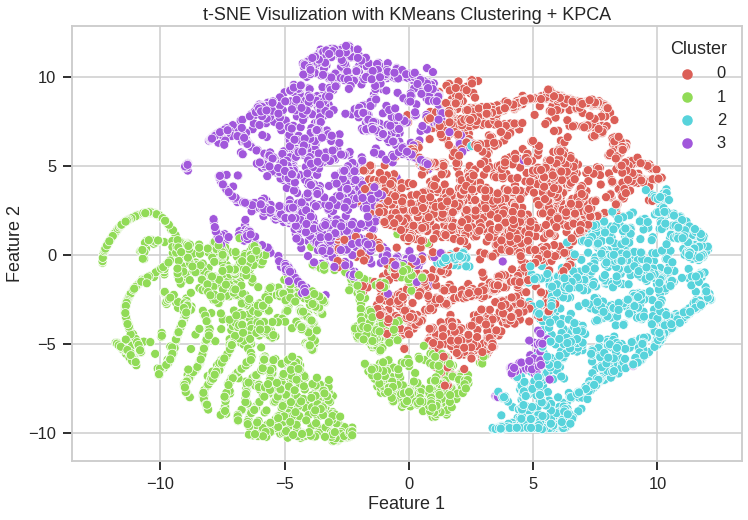

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_km_kpca.columns[0], y=data_tsne_km_kpca.columns[1], 
                data=data_tsne_km_kpca, palette=sns.color_palette("hls", 4),
                hue = data_tsne_km_kpca['Cluster']).set(title='t-SNE Visulization with KMeans Clustering + KPCA')

####**DBSCAN Clustering + KPCA**

**Calculate the optimum "eps" by using K-Nearest Neighbors (KNN).**

In [ ]:
from sklearn.neighbors import NearestNeighbors
# By requesting "min_samples + 1 nearest", we are asking for the nearest 1 data point in addition to the minimum data point, as the data point itself (with a distance of 0) is included in the calculation.
min_samples = 15
knn = NearestNeighbors(n_neighbors=min_samples+1)
knn.fit(data_kpca)
distances, neighbors = knn.kneighbors(data_kpca)

# The "distances" refers to the distance of each data point to its k nearest neighbors.
# The "neighbors" refers to the indices of the k nearest neighbors for each data point.

In [ ]:
distances = np.sort(distances[:,-1], axis = 0)

**Elbow Method to choose the suitable epsilon**

Text(0.5, 1.0, 'Elbow Method for Choosing eps')

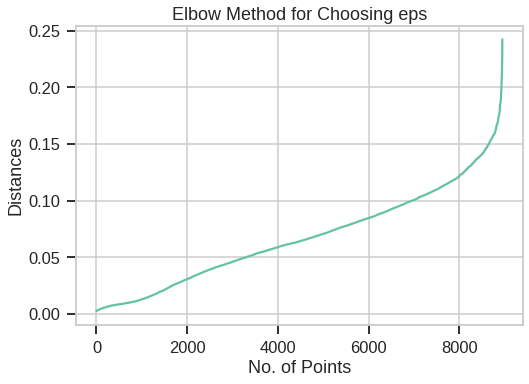

In [ ]:
plt.plot(distances)
plt.xlabel("No. of Points")
plt.ylabel("Distances")
plt.title("Elbow Method for Choosing eps")

📌 From elbow method, the optimum eps = *0.13*




In [ ]:
db_kpca = DBSCAN(eps=0.13, min_samples=15).fit(data_kpca)
db_kpca_labels =db_kpca.labels_
pd.DataFrame(db_kpca_labels).value_counts()

 0    8789
-1     161
dtype: int64

📌 With different value of eps, we have 161 Noise Points

**Visualizing DBSCAN Clustering + KPCA Results with t-SNE**

In [ ]:
data_tsne_db_kpca = data_tsne.copy()
data_tsne_db_kpca['Cluster'] = db_kpca_labels
data_tsne_db_kpca.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        0
1  -6.767416  -3.585382        0
2  10.861821  -3.738966        0
3  -2.325291  -1.241126        0
4  -1.916582  -4.543330        0

[Text(0.5, 1.0, 't-SNE Visulization with DBSCAN Clustering + KPCA')]

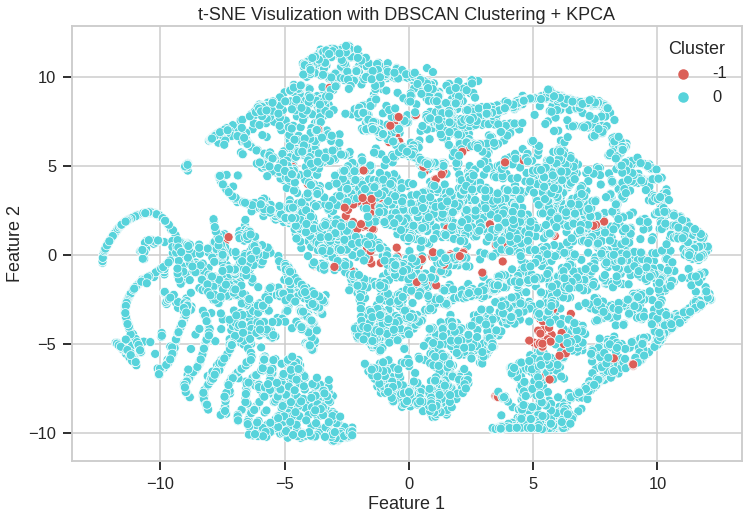

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_db_kpca.columns[0], y=data_tsne_db_kpca.columns[1], 
                data=data_tsne_db_kpca, palette=sns.color_palette("hls", 2),
                hue = data_tsne_db_kpca['Cluster']).set(title='t-SNE Visulization with DBSCAN Clustering + KPCA')

####**Hiereichal Clustering + KPCA**

**Create a Dendogram, and select optimum number of clusters.**

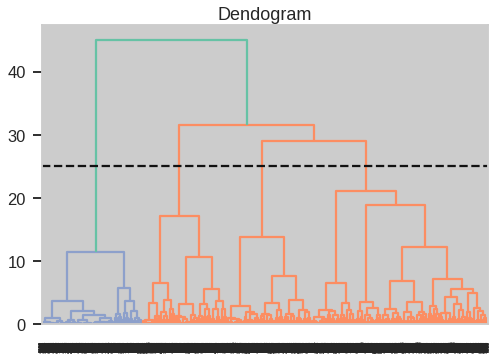

In [ ]:
import scipy.cluster.hierarchy as shc

plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(y=data_kpca, method='ward', metric='euclidean'))
# Cut off Dendogram
plt.axhline(y=25, color='k', linestyle='--')

📌 We will go with 4 clusters as a result of the Dendogram.

In [ ]:
agg_kpca_clustering = AgglomerativeClustering(n_clusters=4).fit(data_kpca)

agg_kpca_labels = agg_kpca_clustering.labels_
 

**Evaluating the Silhouette Score with Agglomerative Clustering + KPCA**




In [ ]:
s_score = silhouette_score(data_kpca, agg_kpca_labels, metric = "euclidean")
print('Silhouett Score: %.3f' % s_score)

Silhouett Score: 0.322


📌 Using KPCA made Silhoutte Score of Hiereichal Clustering increase

**Visualizing Hiereichal Clustering + KPCA Results with t-SNE**

In [ ]:
data_tsne_agg_kpca = data_tsne.copy()
data_tsne_agg_kpca['Cluster'] = agg_kpca_labels
data_tsne_agg_kpca.head()

Feature 1  Feature 2  Cluster
0  -2.177018  -0.936011        0
1  -6.767416  -3.585382        3
2  10.861821  -3.738966        1
3  -2.325291  -1.241126        0
4  -1.916582  -4.543330        0

[Text(0.5, 1.0, 't-SNE Visulization with Hiereichal Clustering + KPCA')]

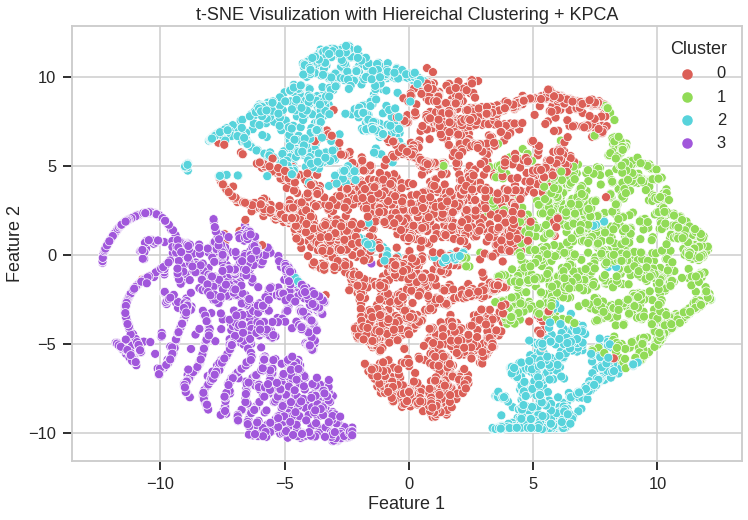

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_tsne_agg_kpca.columns[0], y=data_tsne_agg_kpca.columns[1], 
                data=data_tsne_agg_kpca, palette=sns.color_palette("hls", 4),
                hue = data_tsne_agg_kpca['Cluster']).set(title='t-SNE Visulization with Hiereichal Clustering + KPCA')

## **Discussion and Conclusion of Clustering + Dimensionality Reduction**

###**Discussion:**
* We applied 3 clustering algorithms:
  * Kmeans
  * DBSCAN
  * Heirarchical
* We visualized each of clustering results using t-SNE.
* We applied 2 Dimensionality Reduction:
  * PCA
  * KPCA
* We applied the same 3 clustering algorithms after Dimensionality Reduction:
  * Kmeans + PCA
  * DBSCAN + PCA
  * Heirarchical + PCA
  * Kmeans + KPCA
  * DBSCAN + KPCA
  * Heirarchical + KPCA
* We used 3 Quality Measures to evaluate clustering:
  * Silhoutte Score
  * Davies Bouldin Score
  * Calinski Harabasz Score

###**Conclusion:**
* Among the clustering algorithms, Hierarchical Clustering performed the best.
* KMeans was also satisfactory.
* DBSCAN, however, did not perform well.
* The score was improved upon applying dimensionality reduction technique (PCA).
* KernalPCA, however, did not yield better results than PCA.

**📌 The best clustering results for the upcoming analysis is: Hierarchical Clustering + PCA**

##**Analysis: Credit Card Usage Patterns and Customer Behaviors**

In [ ]:
# Append the final result of the clusters to the original Dataframe
data_analyse = data_log_scaled.copy()
data_analyse['Cluster'] = agg_pca_labels
data_analyse.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  PURCHASES_FREQUENCY  \
0  0.379045           0.862497   0.422994             0.222393   
1  0.819116           0.932886   0.000000             0.000000   
2  0.793799           1.000000   0.615884             1.000000   
3  0.752871           0.710494   0.677125             0.115477   
4  0.680676           1.000000   0.262325             0.115477   

   ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  MINIMUM_PAYMENTS  \
0                    0.000000          0.000000          0.438874   
1                    0.000000          0.333889          0.620013   
2                    1.000000          0.000000          0.572303   
3                    0.115477          0.143798          0.510325   
4                    0.115477          0.000000          0.488693   

   PRC_FULL_PAYMENT  TENURE  Cluster  
0          0.000000     1.0        3  
1          0.289506     1.0        1  
2          0.000000     1.0        2  
3          0.000000     1.0        1  
4          0.000000     1.0        1

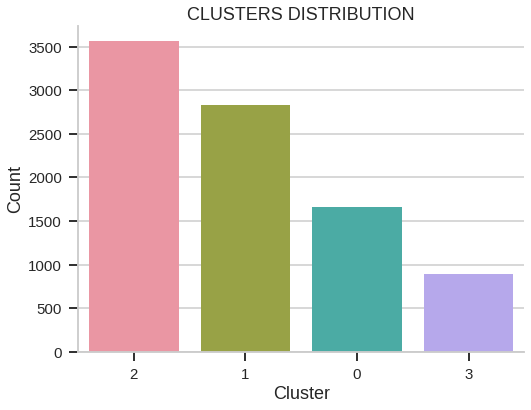

In [ ]:
# Plot
plt.figure(figsize=(8,6))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
cores=['#8da0cb', '#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
ax = sns.countplot(x='Cluster', data=data_analyse, order = data_analyse['Cluster'].value_counts().index)
sns.despine()
plt.title('CLUSTERS DISTRIBUTION')
plt.ylabel('Count')
plt.show();

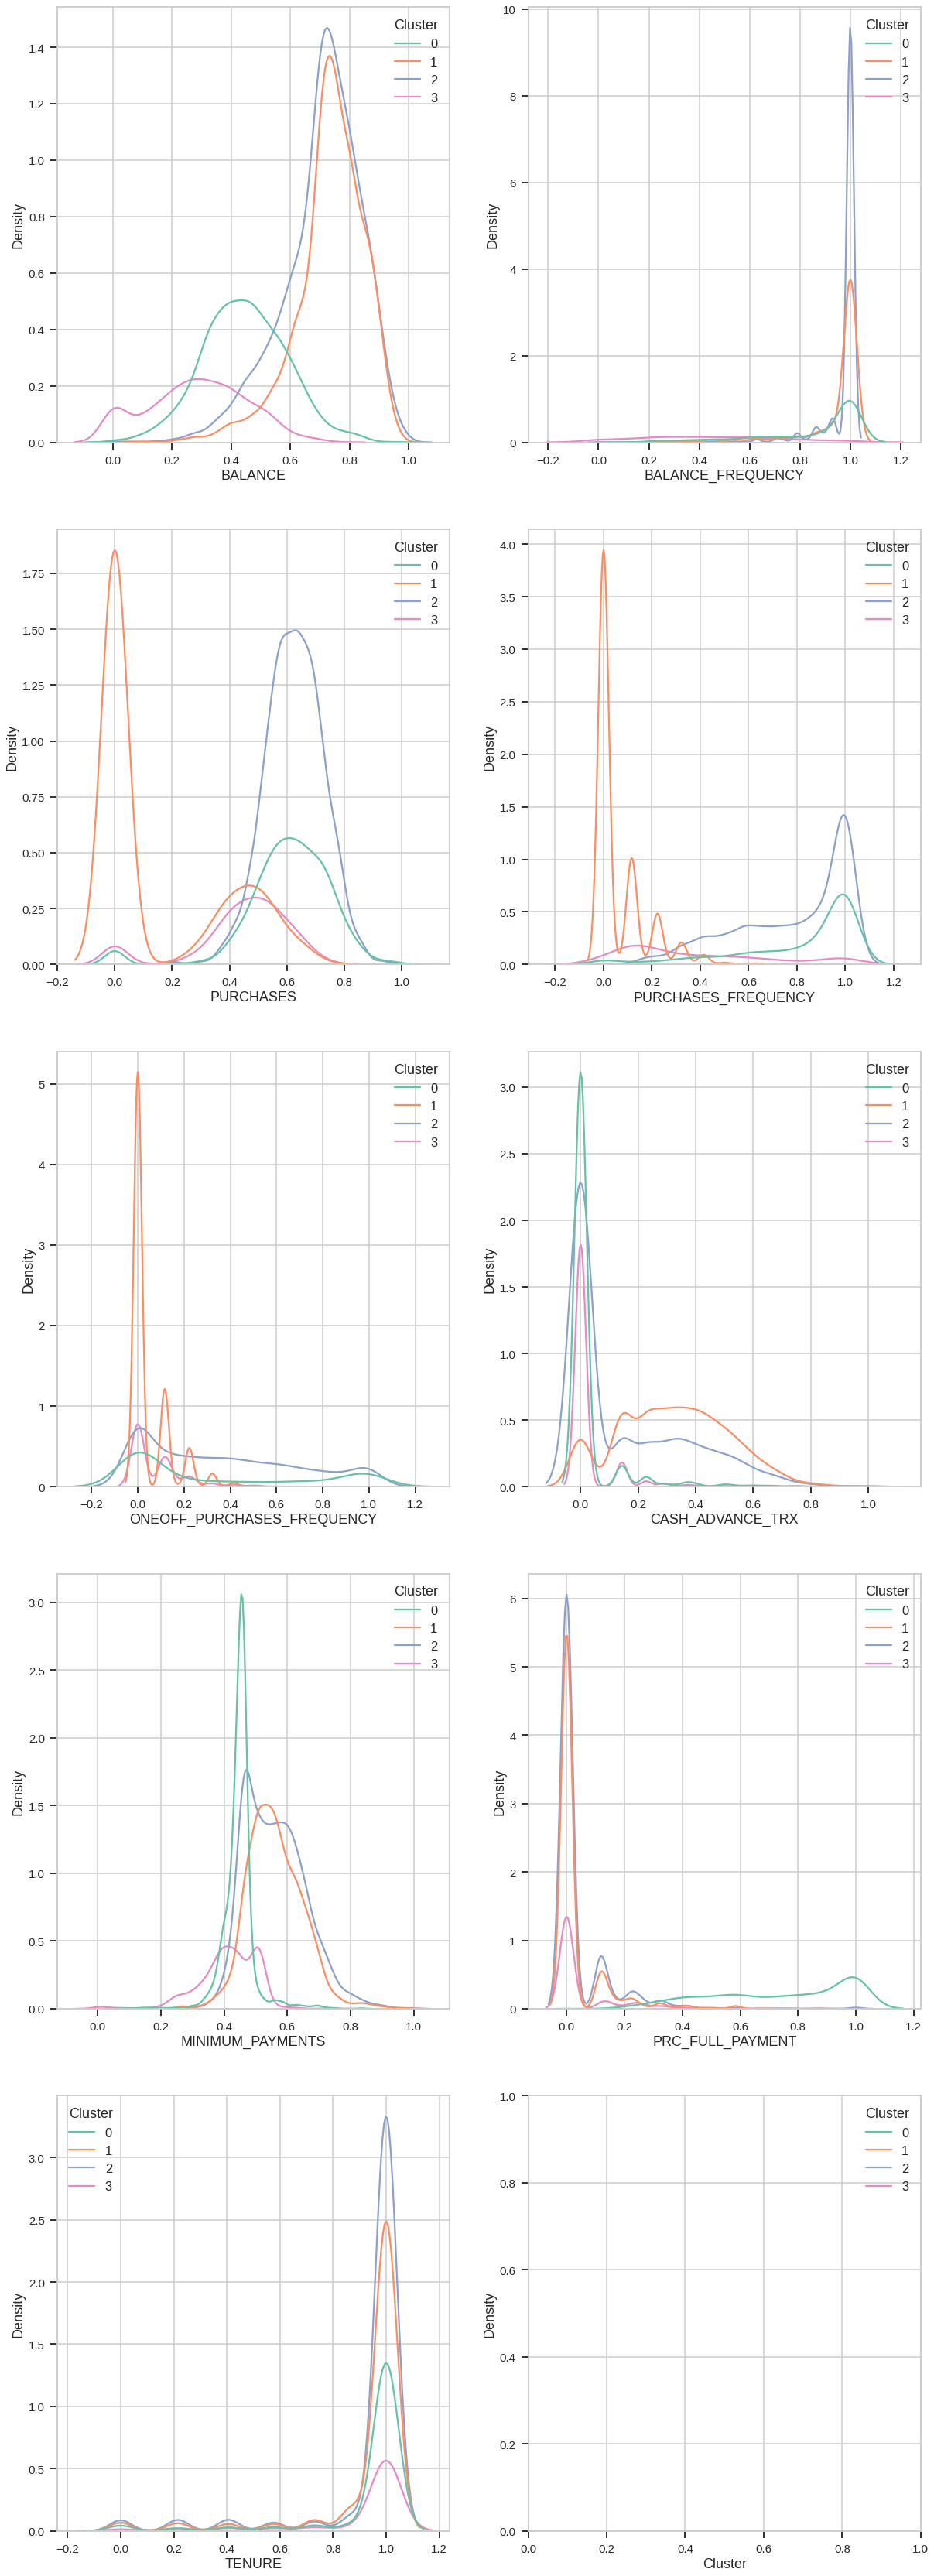

In [ ]:
# Plotting columns by clusters
plt.figure(figsize = (20,60))
x = 1
for d in data_analyse:
    plt.subplot(5, 2, x)
    sns.kdeplot(data=data_analyse, x=d, hue='Cluster', palette='Set2')
    x += 1

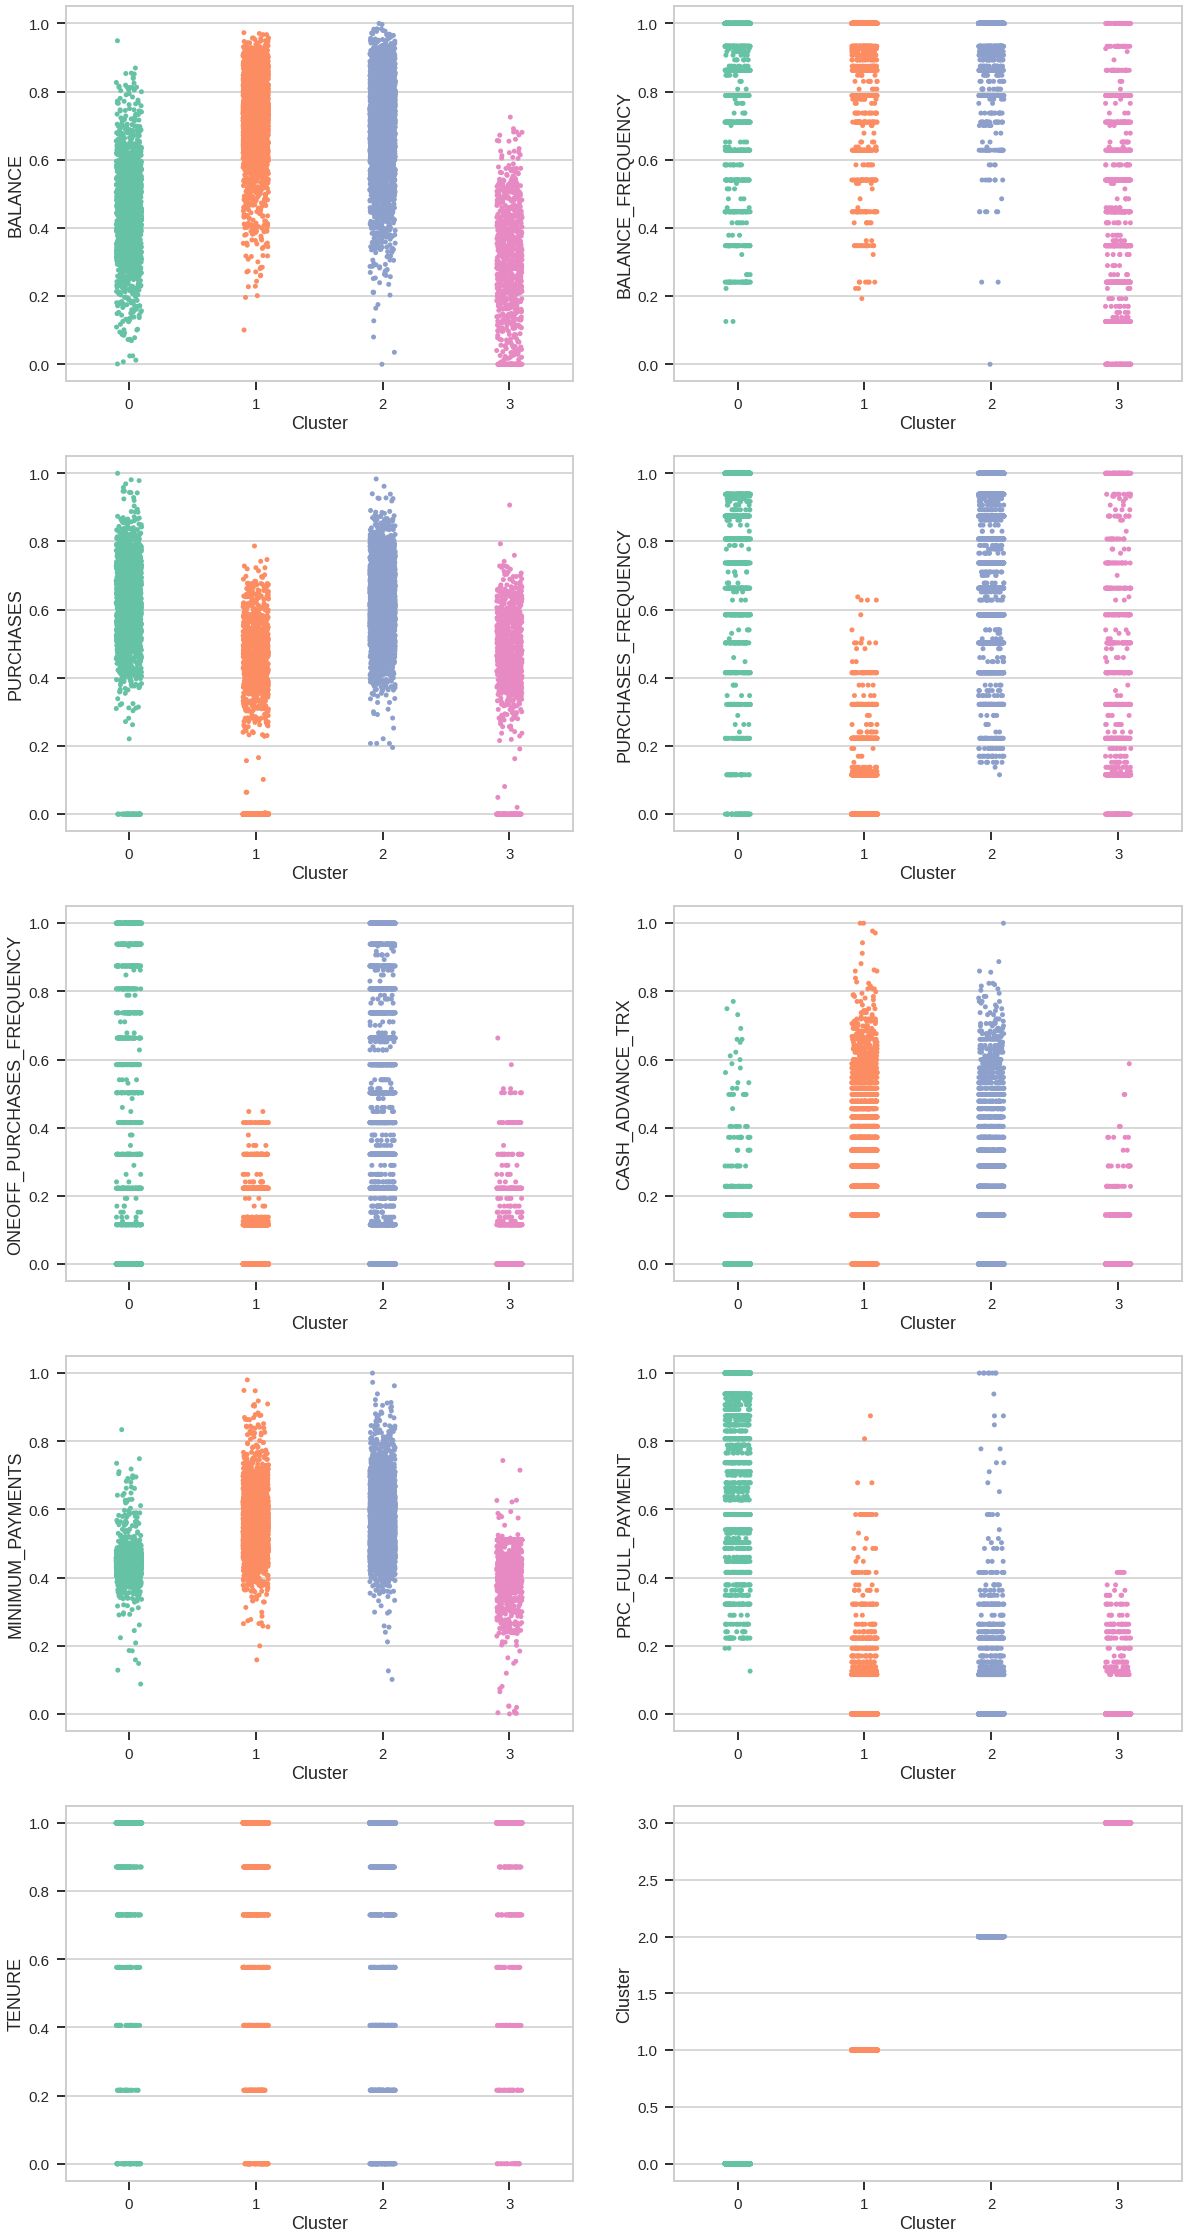

In [ ]:
# Plot of clusters by columns
plt.figure(figsize = (20,40))
x = 1
for d in data_analyse:
    plt.subplot(5, 2, x)
    sns.stripplot(data=data_analyse, x ='Cluster', y=d, palette='Set2')
    x += 1

**BALANCE**

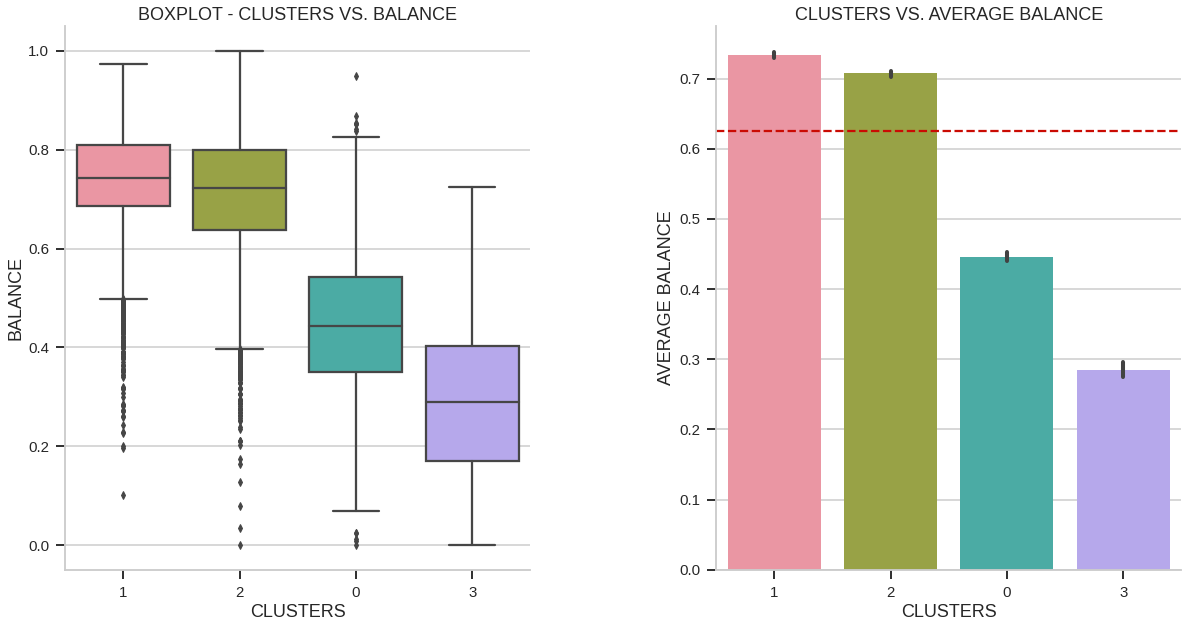

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='BALANCE', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. BALANCE')
plt.xlabel('CLUSTERS')
plt.ylabel('BALANCE')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['BALANCE'])
ax = sns.barplot(x = 'Cluster', y = 'BALANCE', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE BALANCE')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:** Below Average Balance

* **Customer 1:** Highest Balance

* **Customer 2:** Above Average Balance

* **Customer 3:** Lowest Balance



**BALANCE FREQUENCY**

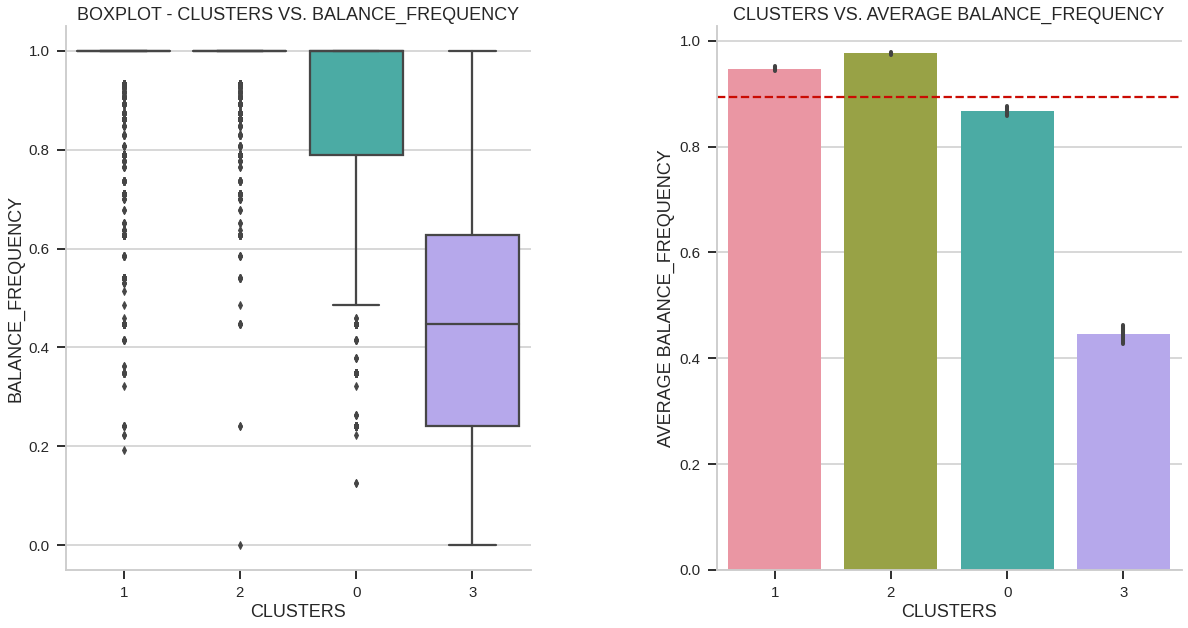

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='BALANCE_FREQUENCY', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. BALANCE_FREQUENCY')
plt.xlabel('CLUSTERS')
plt.ylabel('BALANCE_FREQUENCY')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['BALANCE_FREQUENCY'])
ax = sns.barplot(x = 'Cluster', y = 'BALANCE_FREQUENCY', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE_FREQUENCY')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE BALANCE_FREQUENCY')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:** Balance updated frequently below average

* **Customer 1:** Balance updated more frequently

* **Customer 2:** Balance updated more frequently

* **Customer 3:** Balance updated less frequently

**PURCHASES**

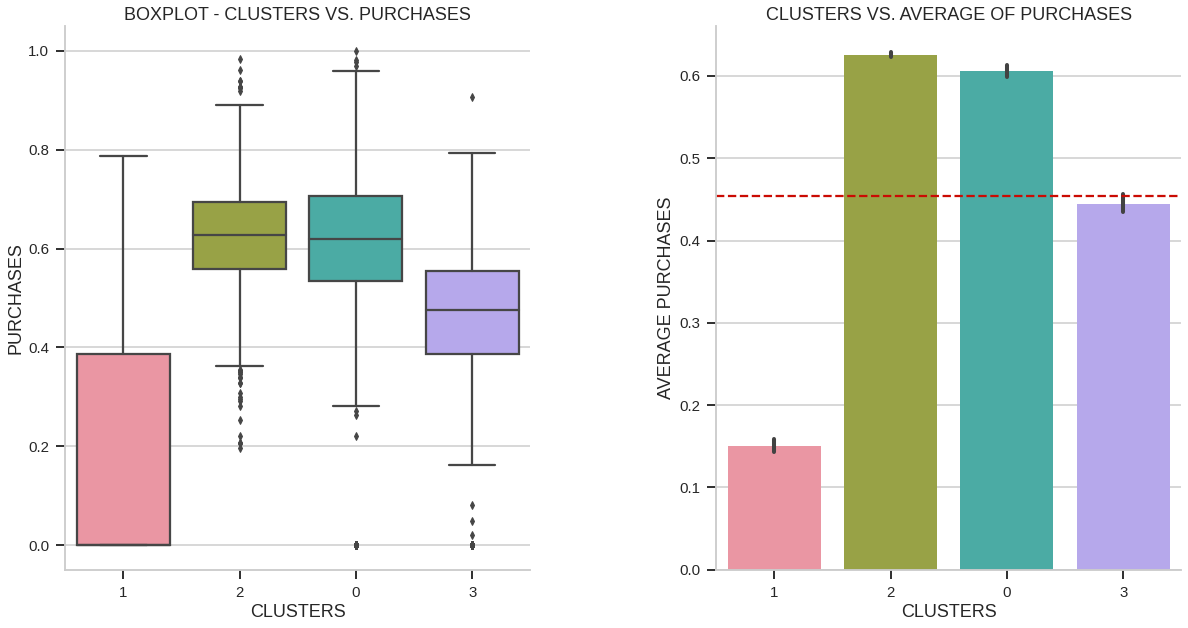

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='PURCHASES', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES')
plt.xlabel('CLUSTERS')
plt.ylabel('PURCHASES')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['PURCHASES'])
ax = sns.barplot(x = 'Cluster', y = 'PURCHASES', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE OF PURCHASES')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE PURCHASES')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:** High purchase value

* **Customer 1:** Very low purchase value

* **Customer 2:** High purchase value

* **Customer 3:** Below average purchase value

**PURCHASES FREQUENCY**

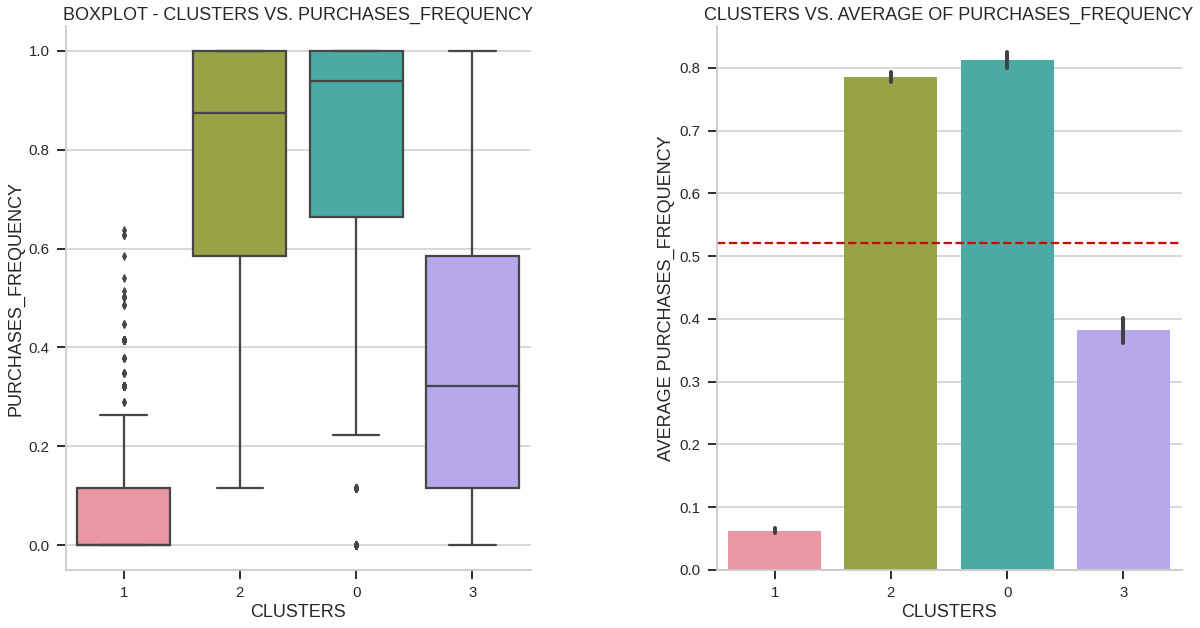

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='PURCHASES_FREQUENCY', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES_FREQUENCY')
plt.xlabel('CLUSTERS')
plt.ylabel('PURCHASES_FREQUENCY')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'Cluster', y = 'PURCHASES_FREQUENCY', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE OF PURCHASES_FREQUENCY')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE PURCHASES_FREQUENCY')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:** High frequency of purchases

* **Customer 1:** Very low frequency of purchases

* **Customer 2:** High frequency of purchases

* **Customer 3:** Below average frequency of purchases

**ONEOFF PURCHASES FREQUENCY**

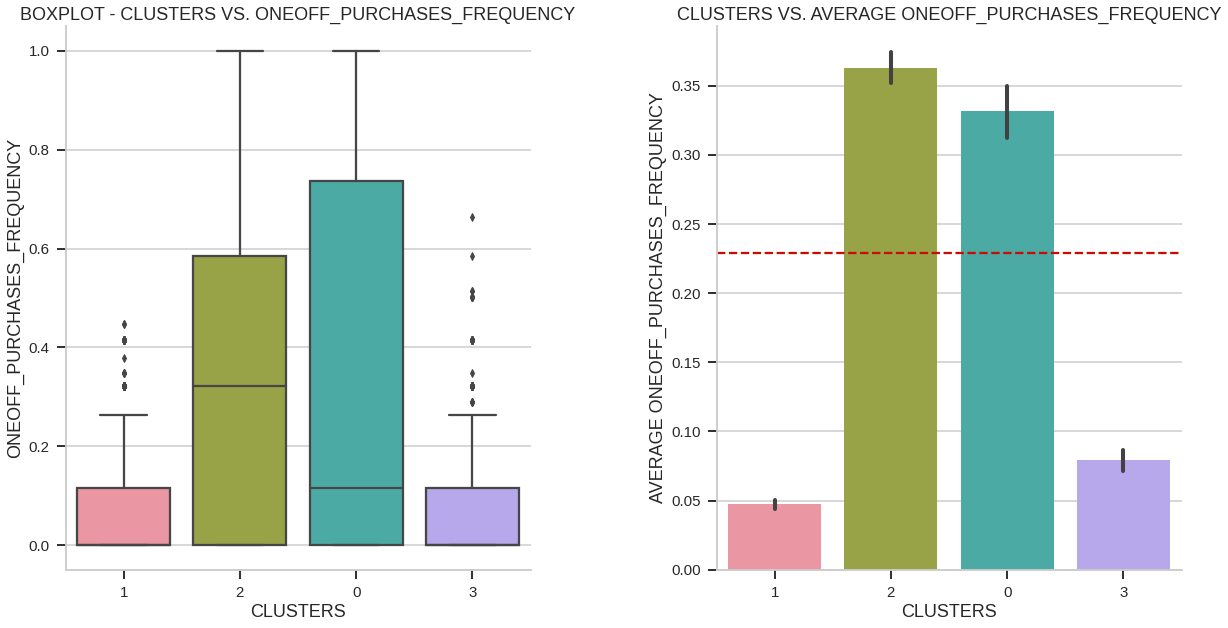

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='ONEOFF_PURCHASES_FREQUENCY', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. ONEOFF_PURCHASES_FREQUENCY')
plt.xlabel('CLUSTERS')
plt.ylabel('ONEOFF_PURCHASES_FREQUENCY')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['ONEOFF_PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'Cluster', y = 'ONEOFF_PURCHASES_FREQUENCY', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE ONEOFF_PURCHASES_FREQUENCY')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE ONEOFF_PURCHASES_FREQUENCY')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:** Frequency of purchases made is very high

* **Customer 1:** Very low frequency of purchases made at once

* **Customer 2:** Frequency of purchases made is very high

* **Customer 3:** Very low frequency of purchases made at once


**CASH ADVANCE TRNSACTIONS**

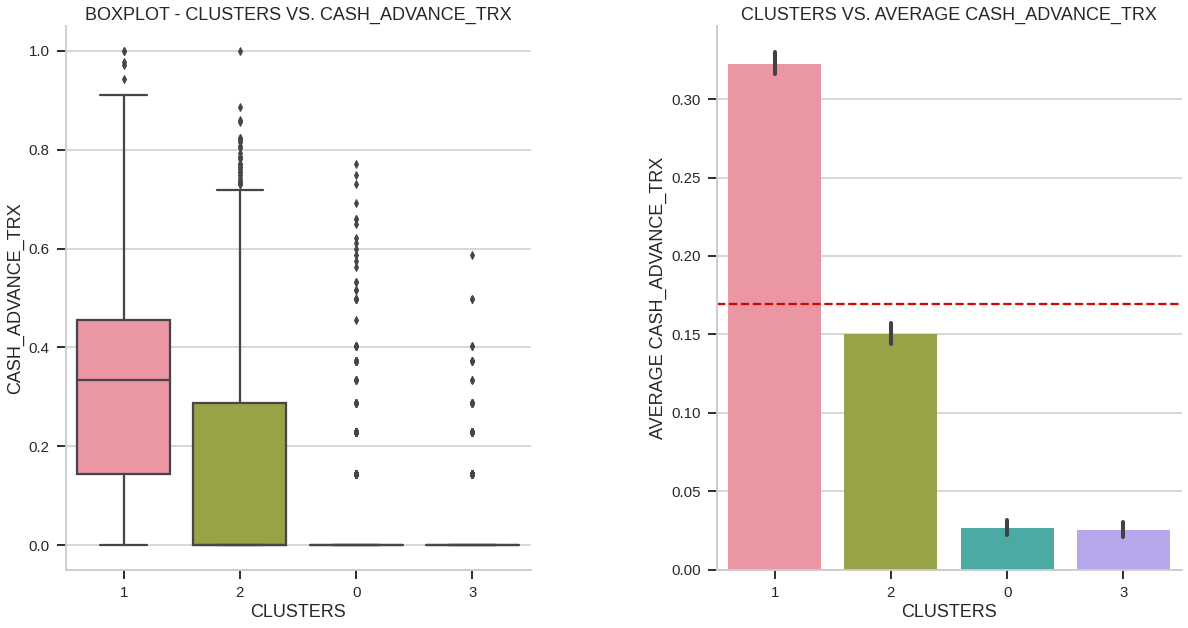

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='CASH_ADVANCE_TRX', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. CASH_ADVANCE_TRX')
plt.xlabel('CLUSTERS')
plt.ylabel('CASH_ADVANCE_TRX')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['CASH_ADVANCE_TRX'])
ax = sns.barplot(x = 'Cluster', y = 'CASH_ADVANCE_TRX', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE CASH_ADVANCE_TRX')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE CASH_ADVANCE_TRX')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:** Very low number of transactions carried out with cash advance

* **Customer 1:** Very high number of transactions carried out with cash advance

* **Customer 2:** Number of transactions carried out with advance cash below average

* **Customer 3:** Very low number of transactions carried out with cash advance

**MINIMUM PAYMENTS**

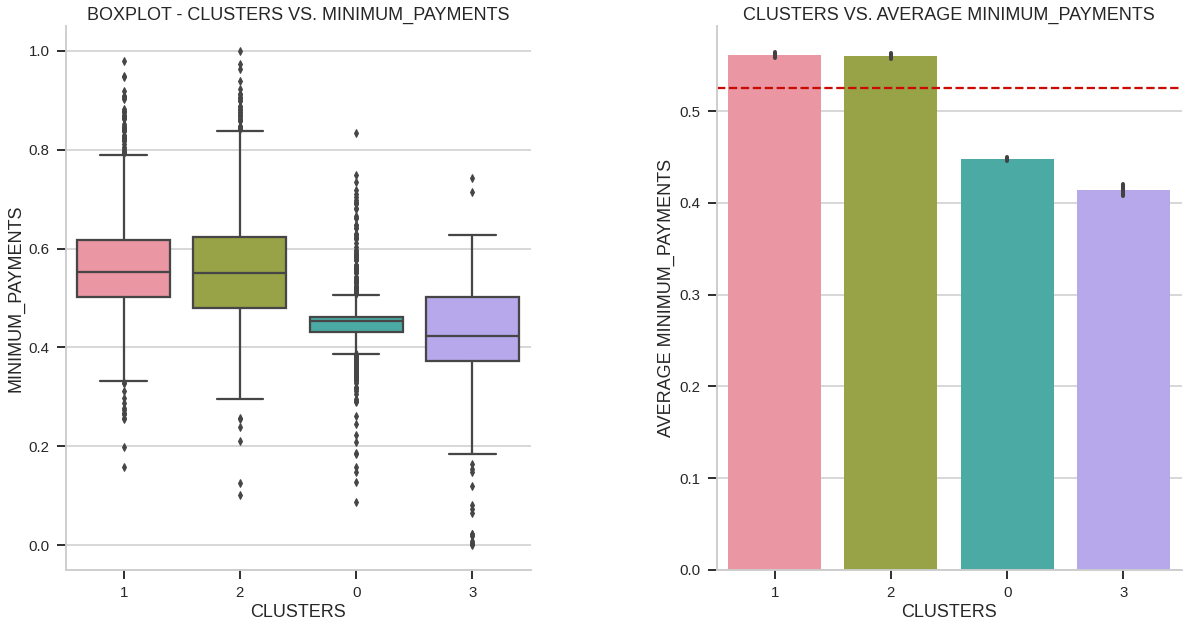

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='MINIMUM_PAYMENTS', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. MINIMUM_PAYMENTS')
plt.xlabel('CLUSTERS')
plt.ylabel('MINIMUM_PAYMENTS')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['MINIMUM_PAYMENTS'])
ax = sns.barplot(x = 'Cluster', y = 'MINIMUM_PAYMENTS', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE MINIMUM_PAYMENTS')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE MINIMUM_PAYMENTS')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:** Minimum amount of payments made by the user is below average

* **Customer 1:** Minimum amount of payments made by the user is high

* **Customer 2:** Minimum amount of payments made by the user is high

* **Customer 3:** Minimum amount of payments made by the user is below average



**PERCENT OF FULL PAYMENT PAID BY USER**

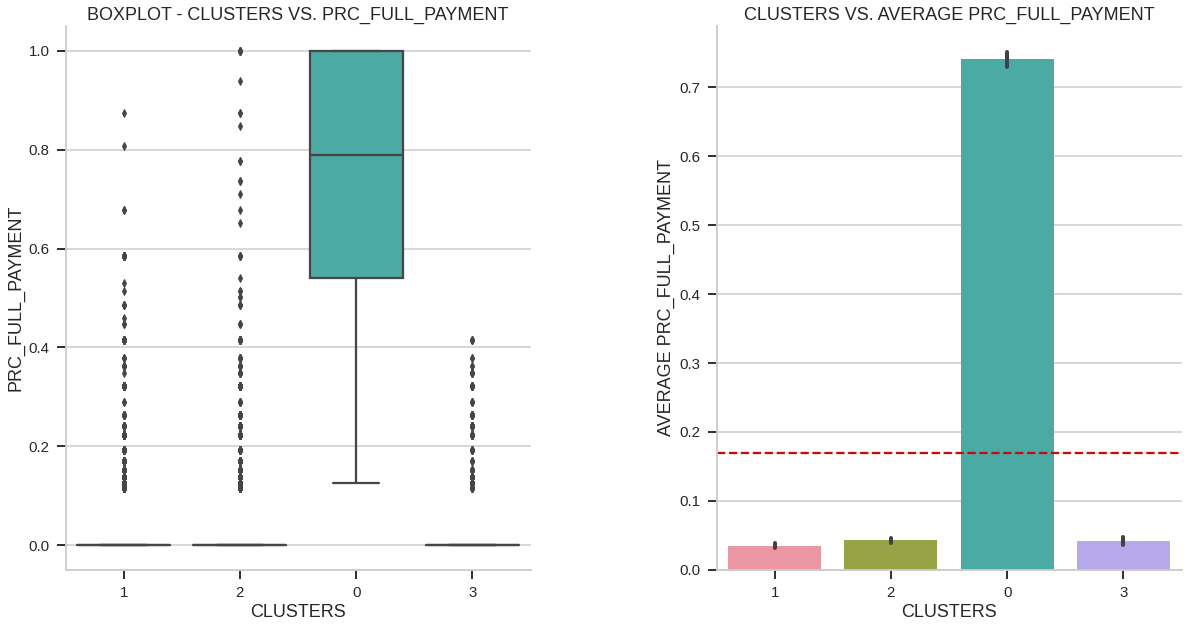

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='PRC_FULL_PAYMENT', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PRC_FULL_PAYMENT')
plt.xlabel('CLUSTERS')
plt.ylabel('PRC_FULL_PAYMENT')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['PRC_FULL_PAYMENT'])
ax = sns.barplot(x = 'Cluster', y = 'PRC_FULL_PAYMENT', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PRC_FULL_PAYMENT')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE PRC_FULL_PAYMENT')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**
* **Customer 0:**  Highest percentage of full payment paid by user

* **Customer 1:** Very low percentage of full payment paid by user

* **Customer 2:** Very low percentage of full payment paid by user

* **Customer 3:** Very low percentage of full payment paid by user



**TENURE**

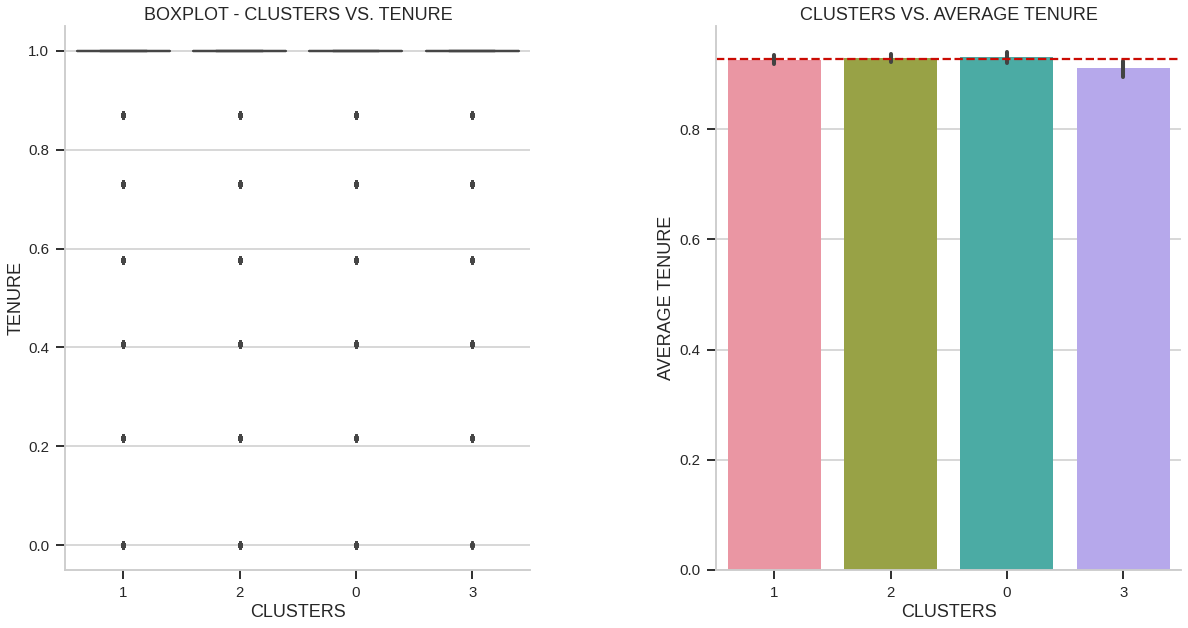

In [ ]:
# Plot

plt.figure(figsize=(20,10))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=data_analyse, x='Cluster', y='TENURE', order = data_analyse.groupby(['Cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. TENURE')
plt.xlabel('CLUSTERS')
plt.ylabel('TENURE')

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(data_analyse['TENURE'])
ax = sns.barplot(x = 'Cluster', y = 'TENURE', data=data_analyse, order = data_analyse.groupby(['Cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE TENURE')
plt.xlabel('CLUSTERS')
plt.ylabel('AVERAGE TENURE')

plt.subplots_adjust(wspace=0.4)
plt.show();

📌 **Interpretation**

**Tenure of credit card service to the user almost equal all customers.**


## **Summary & Conclusion**

The results of the credit card usage analysis have revealed some insights into the behavior and spending patterns of four distinct customer groups. By grouping customers based on their balance, purchase value, frequency of purchases, use of cash advance, and payment habits, we are able to get a better understanding of what drives their financial decisions. 

📌 **Customer 0: Active Spender**

This customer has a balance that is updated frequently and is below average, has high purchase value and high frequency of purchases, with a high number of purchases made at once, a low number of transactions carried out with cash advance, a minimum amount of payments made by the user that is below average, and a high percentage of full payment paid by the user.


📌 **Customer 1: Infrequent Spender with High Balance**

This customer has the highest balance, updates the balance more frequently, has a very low purchase value, and a very low frequency of purchases. They carry out a very high number of transactions with cash advance, and have a high minimum amount of payments made by the user. However, they have a very low percentage of full payment paid by the user.


📌 **Customer 2: Active Spender with High Balance**

This customer has an above average balance, updates the balance more frequently, has high purchase value and high frequency of purchases, with a high number of purchases made at once, a number of transactions carried out with cash advance that is below average, a minimum amount of payments made by the user that is high, and a very low percentage of full payment paid by the user.


📌 **Customer 3: Inactive Spender with Low Balance**

This customer has the lowest balance, updates the balance less frequently, has below average purchase value, and below average frequency of purchases. They carry out a very low number of transactions with cash advance, and have a minimum amount of payments made by the user that is below average, and a very low percentage of full payment paid by the user.


These insights can be useful for credit card companies to tailor their services and offers to better serve the needs of their customers. In this report, we will provide an overview of each customer group and highlight the key characteristics that define them. This information can help credit card companies to better understand their customers and improve their overall customer experience.